In [204]:
import numpy as np
import pandas as pd

import re
import string
import ast

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [205]:
plt.style.use('seaborn')

<ipython-input-205-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [206]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset Tweet

In [207]:
path = '/content/drive/MyDrive/INDONESIA AI/tweet.csv'

In [208]:
df_sentiment = pd.read_csv(path)

In [209]:
df_sentiment.head()

Unnamed: 0 sentimen                                              tweet
0           0  negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...
1           1   netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2           2   netral  Di era Jokowi, ekonomi Indonesia semakin baik....
3           3  positif  Bagi Sumatera Selatan, Asian Games berdampak p...
4           4  negatif  Negara kita ngutang buat bngun infrastruktur y...

# Load Dataset Emoji

In [210]:
path2 = '/content/drive/MyDrive/INDONESIA AI/data-emojis-final.csv'

In [211]:
df_emoji = pd.read_csv(path2)

df_emoji.head()

Unnamed: 0 emoji-symbol meaning meaning-indo emoji-unicode  \
0           0            😄  smiley    tersenyum          ðŸ˜„   
1           1            😃  smiley    tersenyum          ðŸ˜ƒ   
2           2            😀  smiley    tersenyum          ðŸ˜€   
3           3            😊  smiley    tersenyum          ðŸ˜Š   
4           4            🙂   blush      memerah        â˜ºï¸   

                        emoji-name                          emoji-name-indo  
0  grinning face with smiling eyes  wajah menyeringai dengan mata tersenyum  
1      grinning face with big eyes      wajah menyeringai dengan mata besar  
2                    grinning face                        wajah menyeringai  
3   smiling face with smiling eyes    wajah tersenyum dengan mata tersenyum  
4            slightly smiling face             Wajah yang sedikit tersenyum

In [212]:
emoji_dict = dict(zip(df_emoji['emoji-unicode'], df_emoji['meaning-indo']))

emoji_dict

{'ðŸ˜„': 'tersenyum',
 'ðŸ˜ƒ': 'tersenyum',
 'ðŸ˜€': 'tersenyum',
 'ðŸ˜Š': 'tersenyum',
 'â˜ºï¸\x8f': 'memerah',
 'ðŸ˜‰': 'mengedip',
 'ðŸ˜\x8d': 'mata cinta',
 'ðŸ˜˜': 'ciuman',
 'ðŸ˜š': 'ciuman',
 'ðŸ˜—': 'ciuman',
 'ðŸ˜™': 'ciuman',
 'ðŸ˜œ': 'lidah',
 'ðŸ˜\x9d': 'lidah',
 'ðŸ˜›': 'lidah',
 'ðŸ˜³': 'malu',
 'ðŸ˜\x81': 'keju',
 'ðŸ˜”': 'sedih',
 'ðŸ˜Œ': 'sedih',
 'ðŸ˜’': 'sedih',
 'ðŸ˜ž': 'sedih',
 'ðŸ˜£': 'sedih',
 'ðŸ˜¢': 'sedih',
 'ðŸ˜‚': 'sedih',
 'ðŸ˜\xad': 'sedih',
 'ðŸ˜ª': 'sedih',
 'ðŸ˜¥': 'sedih',
 'ðŸ˜°': 'sedih',
 'ðŸ˜…': 'sedih',
 'ðŸ˜“': 'sedih',
 'ðŸ˜©': 'sedih',
 'ðŸ˜«': 'sedih',
 'ðŸ˜¨': 'khawatir',
 'ðŸ˜Ÿ': 'khawatir',
 'ðŸ˜±': 'khawatir',
 'ðŸ˜¦': 'khawatir',
 'ðŸ˜': 'marah',
 'ðŸ˜¡': 'marah',
 'ðŸ˜¤': 'marah',
 'ðŸ˜–': 'menggerenyet',
 'ðŸ˜†': 'tertawa',
 'ðŸ˜‹': 'menjilat bibir',
 'ðŸ˜·': 'alat bantu pernapasan',
 'ðŸ˜Ž': 'kacamata hitam',
 'ðŸ˜´': 'Zzz',
 'ðŸ˜µ': 'mati',
 'ðŸ˜²': 'mati',
 'ðŸ˜§': 'khawatir',
 'ðŸ˜ˆ': 'iblis',
 'ðŸ‘¿': 'iblis',
 'ðŸ˜®': 'Oh',
 'ðŸ˜

# Load Dataset Slang

In [213]:
slang_words1  = open("/content/drive/MyDrive/INDONESIA AI/Project1_Sentiment Analysis/Data/update_combined_slang_words.txt", "r")
slang_words1 = slang_words1.read()
slang_words1 = ast.literal_eval(slang_words1)

In [214]:
len(slang_words1)

1050

In [215]:
slang_words1

{'@': 'di',
 'abis': 'habis',
 'ad': 'ada',
 'adlh': 'adalah',
 'afaik': 'as far as i know',
 'ahaha': 'haha',
 'aj': 'saja',
 'ajep-ajep': 'dunia gemerlap',
 'ak': 'saya',
 'akika': 'aku',
 'akkoh': 'aku',
 'akuwh': 'aku',
 'alay': 'norak',
 'alow': 'halo',
 'ambilin': 'ambilkan',
 'ancur': 'hancur',
 'anjrit': 'anjing',
 'anter': 'antar',
 'ap2': 'apa-apa',
 'apasih': 'apa sih',
 'apes': 'sial',
 'aps': 'apa',
 'aq': 'saya',
 'aquwh': 'aku',
 'asbun': 'asal bunyi',
 'aseekk': 'asyik',
 'asekk': 'asyik',
 'asem': 'asam',
 'aspal': 'asli tetapi palsu',
 'astul': 'asal tulis',
 'ato': 'atau',
 'au ah': 'tidak mau tahu',
 'awak': 'saya',
 'ay': 'sayang',
 'ayank': 'sayang',
 'b4': 'sebelum',
 'bakalan': 'akan',
 'bandes': 'bantuan desa',
 'bangedh': 'banget',
 'banpol': 'bantuan polisi',
 'banpur': 'bantuan tempur',
 'basbang': 'basi',
 'bcanda': 'bercanda',
 'bdg': 'bandung',
 'begajulan': 'nakal',
 'beliin': 'belikan',
 'bencong': 'banci',
 'bentar': 'sebentar',
 'ber3': 'bertiga',
 'b

In [216]:
slang_words2 = pd.read_csv('/content/drive/MyDrive/INDONESIA AI/Project1_Sentiment Analysis/Data/kamus_singkatan.csv', sep=';', header=None, names=['kata_asal', 'kata_baru'])

# Mengonversi DataFrame ke dictionary
slang_words2= slang_words2.set_index('kata_asal')['kata_baru'].to_dict()

# Menampilkan hasil
print(slang_words2)

{'aamiin': 'amin ', 'adek': 'adik ', 'adlh': 'adalah ', 'aer': 'air ', 'aiskrim': 'es krim ', 'aj': 'saja ', 'aja': 'saja ', 'ajah': 'saja ', 'ajalah': 'saja ', 'aje': 'saja ', 'ajh': 'saja', 'ajj': 'saja', 'aku': 'saya', 'ak': 'saya ', 'akoh': 'saya', 'akutu': 'saya', 'aq': 'saya', 'alesan': 'alasan ', 'ama': 'sama ', 'amaca': 'ah masa', 'amuh': 'kamu', 'ancur': 'hancur ', 'ane': 'saya ', 'anget': 'hangat ', 'anjeng': 'anjing ', 'ank': 'anak ', 'apah': 'apa ', 'aph': 'apa', 'apo': 'apa ', 'apose': 'apa', 'apz': 'apa', 'artine': 'artinya ', 'asek': 'asik ', 'ati2': 'hati-hati ', 'atit': 'sakit ', 'atu': 'satu ', 'atw': 'atau ', 'ayang': 'sayang ', 'ayuk': 'ayo ', 'babang': 'abang', 'bae': 'baik ', 'bais': 'habis', 'bakalan': 'akan ', 'bales': 'balas ', 'bandingin': 'bandingkan ', 'banget': 'sekali ', 'bangett': 'sangat ', 'banyakin': 'perbanyak ', 'barengan': 'bersamaan ', 'baryaw': 'sabar ya', 'baso': 'bakso ', 'bay': 'selamat tinggal', 'bbrp': 'beberapa ', 'bc': 'baca ', 'bcs': 'bisa

In [217]:
# Membaca CSV ke dalam DataFrame
# df = pd.read_csv('/content/drive/MyDrive/INDONESIA AI/Project1_Sentiment Analysis/Data/kamus_alay.csv', sep='\t', usecols=['slang', 'formal'], quoting=3)

df = pd.read_csv('/content/drive/MyDrive/INDONESIA AI/Project1_Sentiment Analysis/Data/kamus_alay_.csv', sep='\t')
df.values

# Inisialisasi kamus kosong
slang_words3 = {}

# Iterasi melalui setiap baris dalam DataFrame
for row in df.values:
    # Pisahkan kata alay dan artinya
    kata_alay, artinya = row[0].split(',')

    # Tambahkan ke kamus
    slang_words3[kata_alay] = artinya

print(slang_words3)

{'woww': 'wow', 'aminn': 'amin', 'met': 'selamat', 'netaas': 'menetas', 'keberpa': 'keberapa', 'eeeehhhh': 'eh', 'kata2nyaaa': 'kata-katanya', 'hallo': 'halo', 'kaka': 'kakak', 'ka': 'kak', 'daah': 'dah', 'aaaaahhhh': 'ah', 'yaa': 'ya', 'smga': 'semoga', 'slalu': 'selalu', 'amiin': 'amin', 'kk': 'kakak', 'trus': 'terus', 'sii': 'sih', 'nyenengin': 'menyenangkan', 'bgt': 'banget', 'gemess': 'gemas', 'akuuu': 'aku', 'jgn': 'jangan', 'udah': 'sudah', 'gitu': 'begitu', 'aja': 'saja', 'gemesiin': 'menggemaskan', 'menyenangkn': 'menyenangkan', 'rb': 'ribu', 'akau': 'aku', 'saranin': 'menyarankan', 'nemuin': 'menemukan', 'yah': 'ya', 'mnis2nya': 'manis-manisnya', 'gtu': 'begitu', 'tu': 'itu', 'idolaa': 'idola', 'bangett': 'banget', 'kaakk': 'kak', 'baaiikkk': 'baik', 'telaatt': 'telat', 'kaak': 'kak', 'yg': 'yang', 'lg': 'lagi', 'skarang': 'sekarang', 'sempet': 'sempat', 'karna': 'karena', 'ngga': 'enggak', 'mantep': 'mantap', 'loohhh': 'loh', 'yeee': 'ya', 'baguuuuus': 'bagus', 'sampe': 'sam

# Check Data Info

In [218]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1815 non-null   int64 
 1   sentimen    1815 non-null   object
 2   tweet       1815 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.7+ KB


# Check the Amount of Data For Each Class in the Sentiment Column

In [219]:
sentiment_counts = df_sentiment['sentimen'].value_counts(ascending=True)

sentiment_counts

negatif    596
netral     607
positif    612
Name: sentimen, dtype: int64

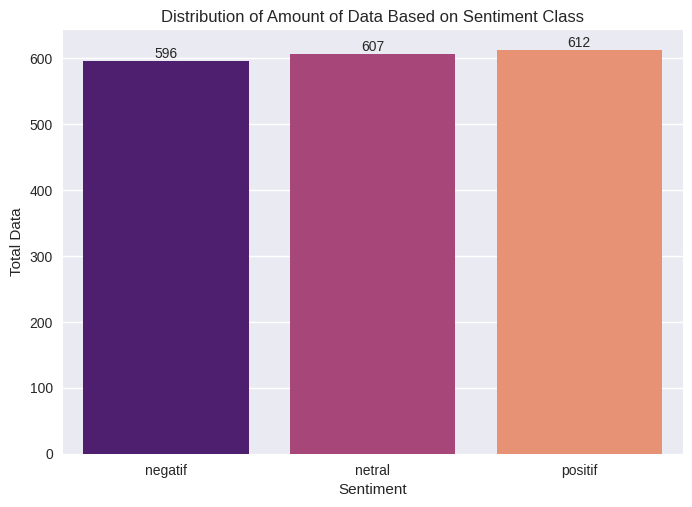

In [220]:
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='magma')

for p in ax.containers:
  ax.bar_label(p,)

plt.xlabel('Sentiment')
plt.ylabel('Total Data')
plt.title('Distribution of Amount of Data Based on Sentiment Class')

plt.show()

# Check Tweet Length

## Feature Engineering: Creating New Features
Created a new feature to find out the length of the shortest and longest tweets

In [221]:
df_sentiment['tweet_length'] = df_sentiment['tweet'].str.split(' ').apply(len)

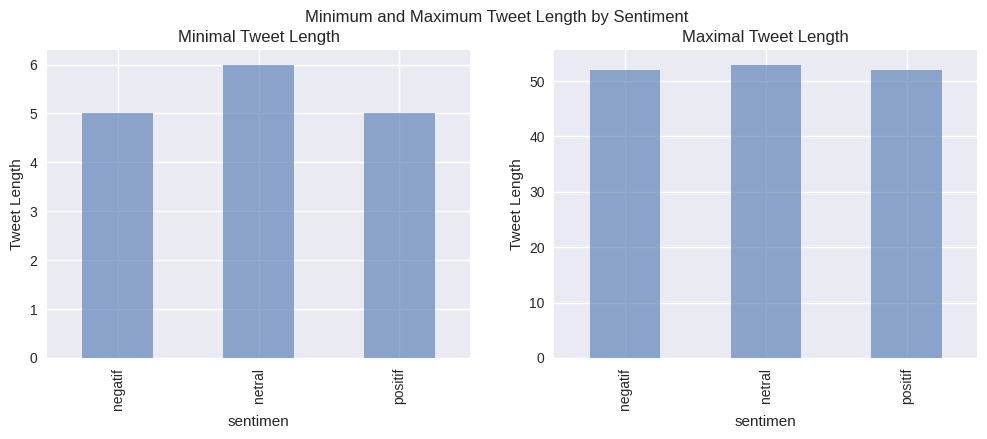

In [222]:
# Membuat grafik
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Minimum and Maximum Tweet Length by Sentiment')

# Grafik panjang tweet minimal
df_sentiment.groupby('sentimen')['tweet_length'].min().plot(kind='bar', ax=axes[0], alpha=0.6)
axes[0].set_title('Minimal Tweet Length')
axes[0].set_ylabel('Tweet Length')

df_sentiment.groupby('sentimen')['tweet_length'].max().plot(kind='bar', ax=axes[1], alpha=0.6)
axes[1].set_title('Maximal Tweet Length')
axes[1].set_ylabel('Tweet Length')

plt.show()

# Check the number of occurrences of words and wordcloud before Preprocessing

In [223]:
def calculate_freqdist(category, data_target):
    fdist = FreqDist()

    for sentiment, text in zip(df_sentiment['sentimen'], data_target):  # Perbaikan ini

        if category == 'all' or category == sentiment:

            # Menghilangkan karakter khusus seperti titik, koma, hashtag, dll.
            processedtext = re.sub(r'[^\w\s]', '', text)

            tokens = word_tokenize(processedtext)  # Perbaikan ini
            tokens = [token.lower() for token in tokens]

            # stop_words = set(stopwords.words('indonesian'))
            # tokens = [token for token in tokens if token not in stop_words]

            fdist.update(tokens)

    return fdist

# Ubah FreqDist ke dalam DataFrame
def freqdist_to_dataframe(fdist, top_n=15):

    freq_dist_dict = dict(fdist.most_common(top_n))

    df = pd.DataFrame(list(freq_dist_dict.items()), columns=['Word', 'Frequency'])

    return df

def plot_freqdist(df, title):

    plt.figure(figsize=(10, 5))

    ax = sns.barplot(data=df, x='Frequency', y='Word', palette='rocket')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + 0.5), ha='right', va='center', color='white')

    plt.title(title)

    plt.show();

In [224]:
def create_wordcloud(category, title, palette, data_target):

    if category == 'all':
        sentiment_data = ' '.join(data_target)
    else:
        sentiment_data = ' '.join(data_target[j] for j in range(len(df_sentiment['sentimen'])) if df_sentiment['sentimen'][j] == category)

    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap=palette, collocations=False).generate(sentiment_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

## All Data

### Freqdist

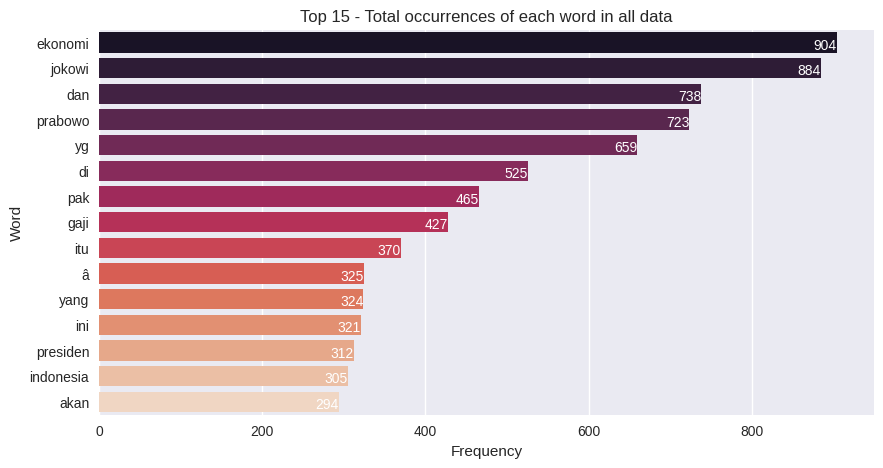

In [225]:
all_freqdist = calculate_freqdist('all', df_sentiment['tweet'])

all_freqdist_df = freqdist_to_dataframe(all_freqdist)

plot_freqdist(all_freqdist_df, 'Top 15 - Total occurrences of each word in all data')

In [226]:
all_freqdist

FreqDist({'ekonomi': 904, 'jokowi': 884, 'dan': 738, 'prabowo': 723, 'yg': 659, 'di': 525, 'pak': 465, 'gaji': 427, 'itu': 370, 'â': 325, ...})

### WordCloud

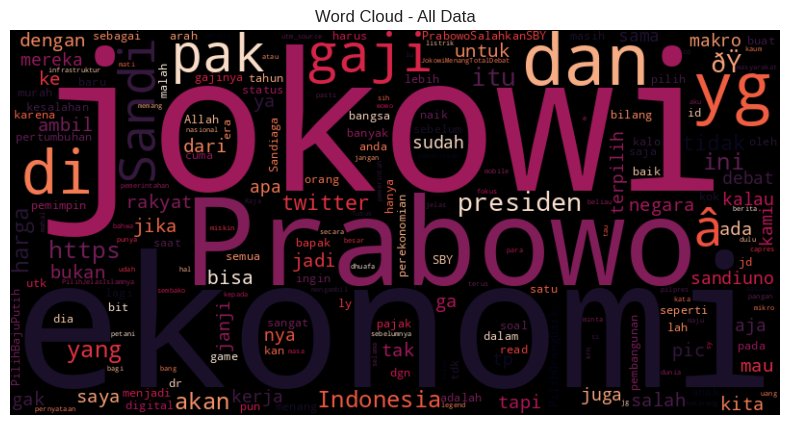

In [227]:
create_wordcloud('all', 'Word Cloud - All Data', 'rocket', df_sentiment['tweet'])

## Neutral Sentiment Data

### Freqdist

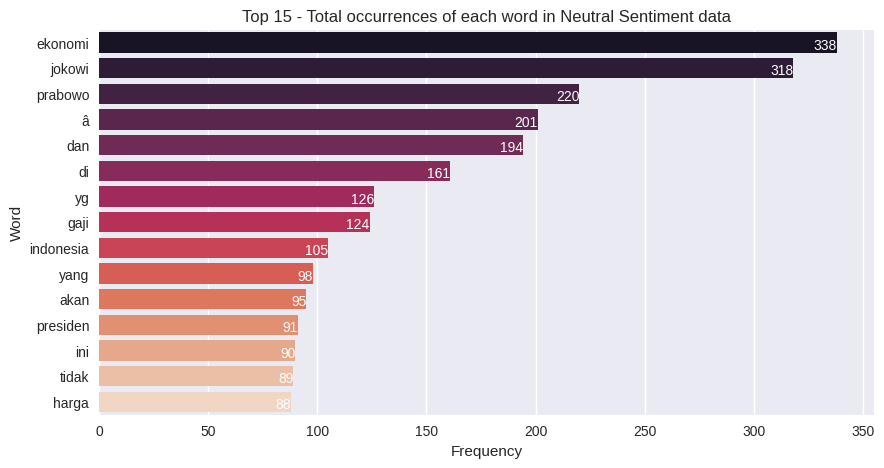

In [228]:
neutral_freqdist = calculate_freqdist('netral', df_sentiment['tweet'])

neutral_freqdist_df = freqdist_to_dataframe(neutral_freqdist)

plot_freqdist(neutral_freqdist_df, 'Top 15 - Total occurrences of each word in Neutral Sentiment data')

### WordCloud

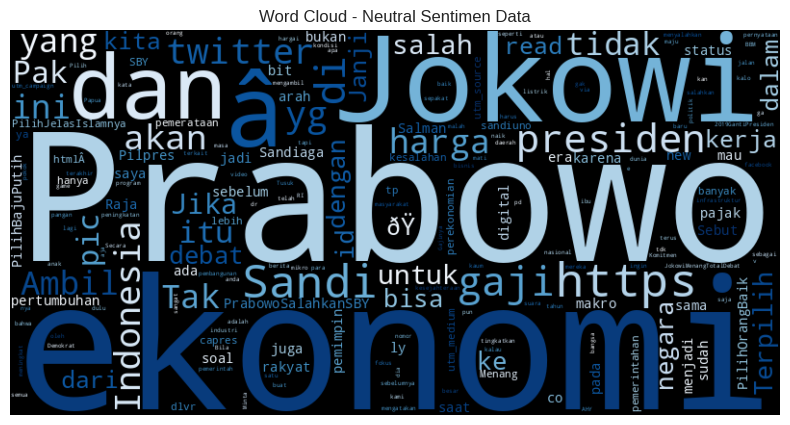

In [229]:
create_wordcloud('netral', 'Word Cloud - Neutral Sentimen Data', 'Blues', df_sentiment['tweet'])

## Positive Sentiment Data

### Freqdist

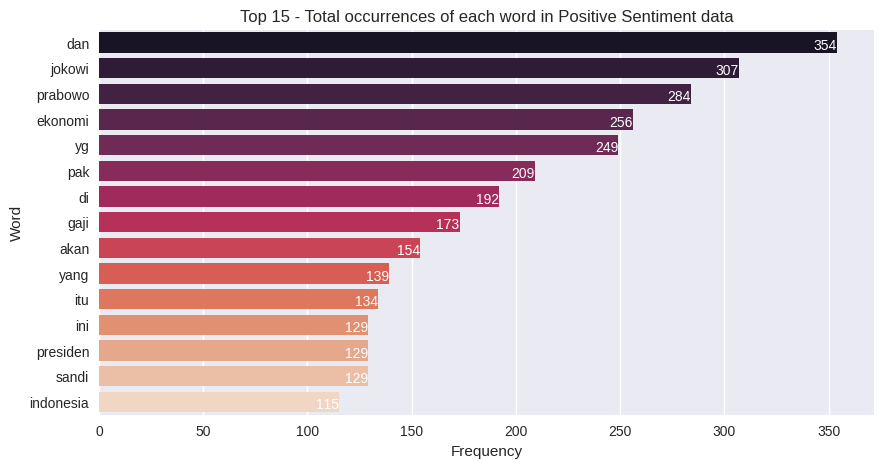

In [230]:
positive_freqdist = calculate_freqdist('positif', df_sentiment['tweet'])

positive_freqdist_df = freqdist_to_dataframe(positive_freqdist)

plot_freqdist(positive_freqdist_df, 'Top 15 - Total occurrences of each word in Positive Sentiment data')

### WordCloud

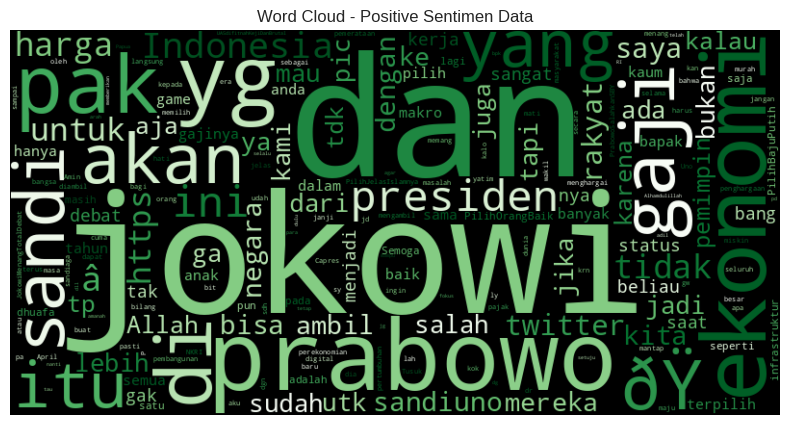

In [231]:
create_wordcloud('positif', 'Word Cloud - Positive Sentimen Data', 'Greens', df_sentiment['tweet'])

## Negative Sentiment Data

### Freqdist

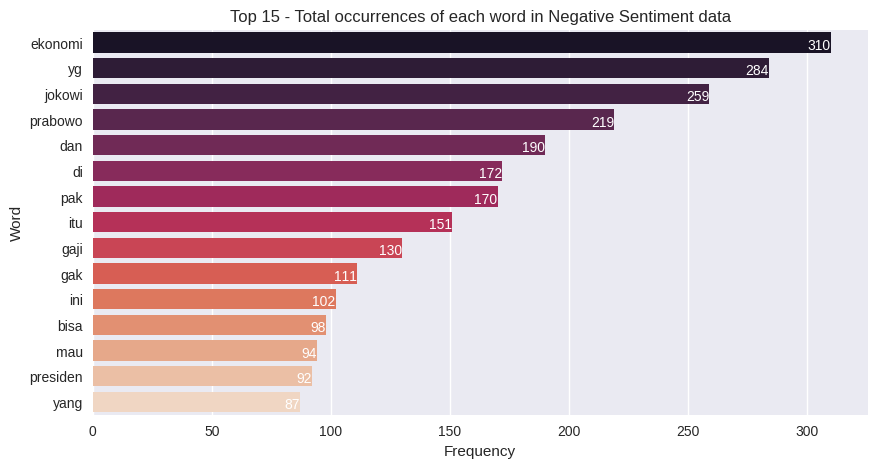

In [232]:
negative_freqdist = calculate_freqdist('negatif', df_sentiment['tweet'])

negative_freqdist_df = freqdist_to_dataframe(negative_freqdist)

plot_freqdist(negative_freqdist_df, 'Top 15 - Total occurrences of each word in Negative Sentiment data')

### WordCloud

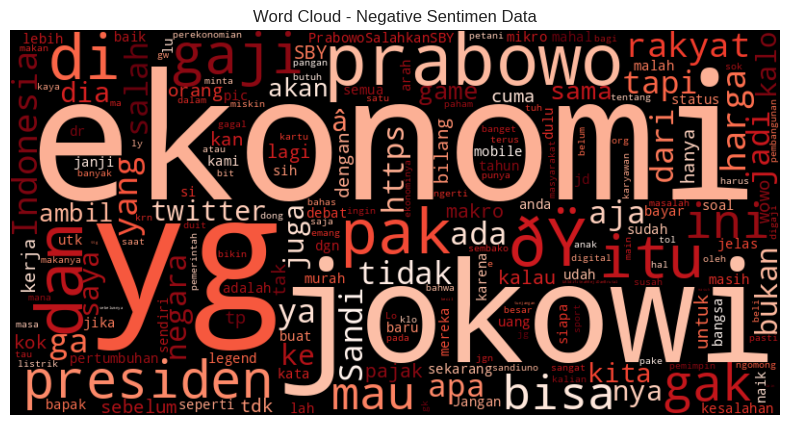

In [233]:
create_wordcloud('negatif', 'Word Cloud - Negative Sentimen Data', 'Reds', df_sentiment['tweet'])

# Understanding Hashtag Impact

Sometimes hashtags reflect a topic for each type of sentiment so it is necessary to analyze whether they are correct

In [234]:
def hashtag_extract(x):
    hashtags = []    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

## Hashtag in Neutral Sentiment

In [235]:
hashtag_neutral = hashtag_extract(df_sentiment['tweet'][df_sentiment['sentimen'] == 'netral'])

In [236]:
hashtag_neutral = sum(hashtag_neutral, [])

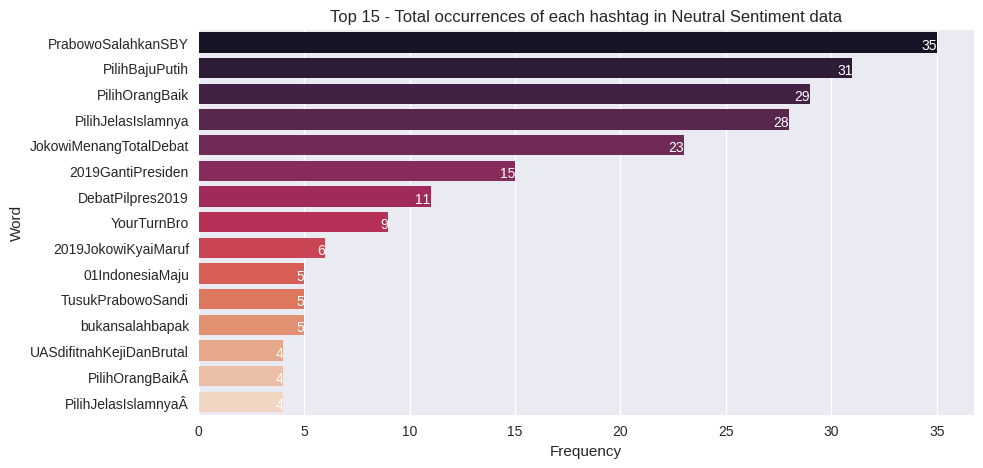

In [237]:
from collections import Counter

neutral_hashtag_freqdist_df = freqdist_to_dataframe(Counter(hashtag_neutral))

plot_freqdist(neutral_hashtag_freqdist_df, 'Top 15 - Total occurrences of each hashtag in Neutral Sentiment data')

## Hashtag in Positive Sentiment

In [238]:
hashtag_positive = hashtag_extract(df_sentiment['tweet'][df_sentiment['sentimen'] == 'positif'])

In [239]:
hashtag_positive = sum(hashtag_positive, [])

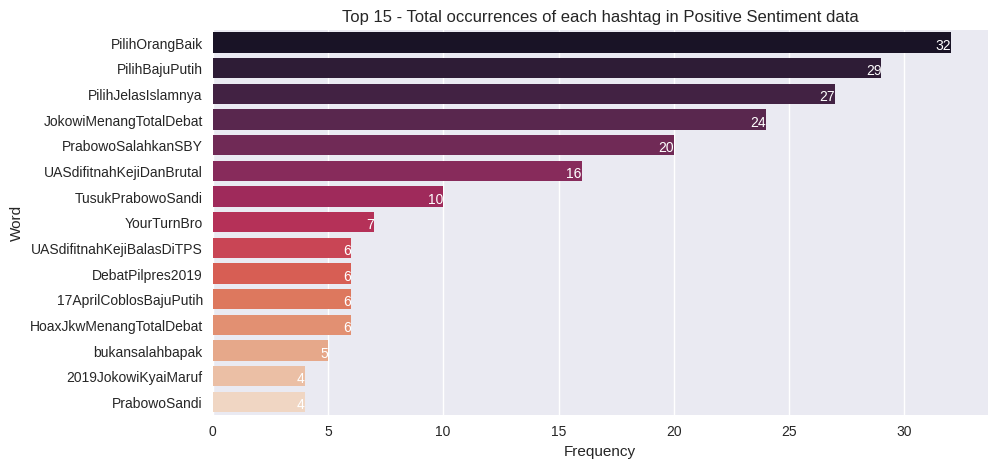

In [240]:
from collections import Counter

positive_hashtag_freqdist_df = freqdist_to_dataframe(Counter(hashtag_positive))

plot_freqdist(positive_hashtag_freqdist_df, 'Top 15 - Total occurrences of each hashtag in Positive Sentiment data')

## Hashtag in Negative Sentiment

In [241]:
hashtag_negative = hashtag_extract(df_sentiment['tweet'][df_sentiment['sentimen'] == 'negatif'])

In [242]:
hashtag_negative = sum(hashtag_negative, [])

In [243]:
# Counter(hashtag_negative)

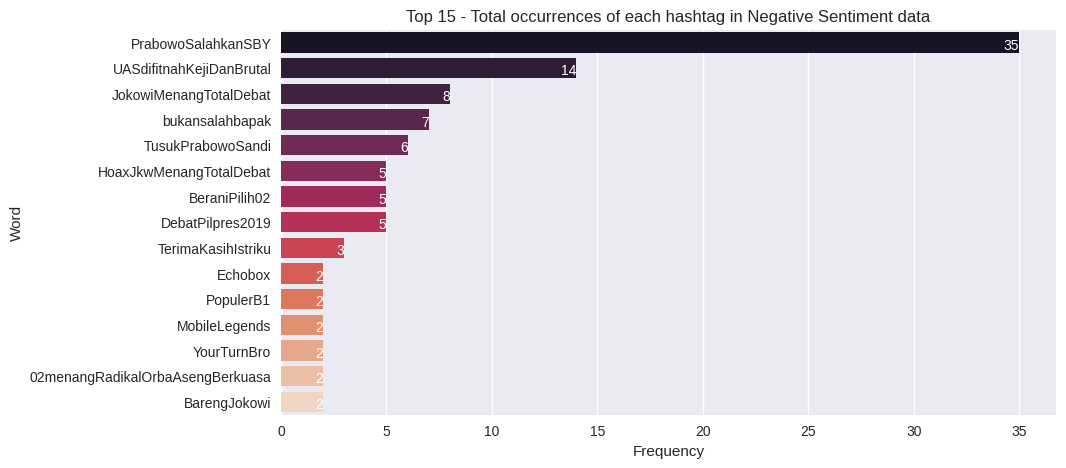

In [244]:
from collections import Counter

negative_hashtag_freqdist_df = freqdist_to_dataframe(Counter(hashtag_negative))

plot_freqdist(negative_hashtag_freqdist_df, 'Top 15 - Total occurrences of each hashtag in Negative Sentiment data')

# Understanding Emoji Impact

In [245]:
emoji_unicode_list = df_emoji['emoji-unicode'].tolist()
emoji_unicode_list[:5]

['ðŸ˜„', 'ðŸ˜ƒ', 'ðŸ˜€', 'ðŸ˜Š', 'â˜ºï¸\x8f']

In [246]:
emoji_regex_pattern = '|'.join(re.escape(emoji) for emoji in emoji_unicode_list)
emoji_regex_pattern

'ðŸ˜„|ðŸ˜ƒ|ðŸ˜€|ðŸ˜Š|â˜ºï¸\x8f|ðŸ˜‰|ðŸ˜\x8d|ðŸ˜˜|ðŸ˜š|ðŸ˜—|ðŸ˜™|ðŸ˜œ|ðŸ˜\x9d|ðŸ˜›|ðŸ˜³|ðŸ˜\x81|ðŸ˜”|ðŸ˜Œ|ðŸ˜’|ðŸ˜ž|ðŸ˜£|ðŸ˜¢|ðŸ˜‚|ðŸ˜\xad|ðŸ˜ª|ðŸ˜¥|ðŸ˜°|ðŸ˜…|ðŸ˜“|ðŸ˜©|ðŸ˜«|ðŸ˜¨|ðŸ˜Ÿ|ðŸ˜¨|ðŸ˜Ÿ|ðŸ˜±|ðŸ˜¦|ðŸ˜±|ðŸ˜¦|ðŸ˜|ðŸ˜¡|ðŸ˜¤|ðŸ˜–|ðŸ˜†|ðŸ˜‹|ðŸ˜·|ðŸ˜Ž|ðŸ˜´|ðŸ˜µ|ðŸ˜²|ðŸ˜§|ðŸ˜ˆ|ðŸ‘¿|ðŸ˜®|ðŸ˜¬|ðŸ˜\x90|ðŸ˜•|ðŸ˜¯|ðŸ˜¶|ðŸ˜‡|ðŸ˜\x8f|ðŸ˜‘|ðŸ‘²|ðŸ‘²ðŸ\x8f»|ðŸ‘²ðŸ\x8f¼|ðŸ‘²ðŸ\x8f½|ðŸ‘²ðŸ\x8f¾|ðŸ‘²ðŸ\x8f¿|ðŸ‘³|ðŸ‘³ðŸ\x8f»|ðŸ‘³ðŸ\x8f¼|ðŸ‘³ðŸ\x8f½|ðŸ‘³ðŸ\x8f¾|ðŸ‘³ðŸ\x8f¿|ðŸ‘®|ðŸ‘®ðŸ\x8f»|ðŸ‘®ðŸ\x8f¼|ðŸ‘®ðŸ\x8f½|ðŸ‘®ðŸ\x8f¾|ðŸ‘®ðŸ\x8f¿|ðŸ‘·|ðŸ‘·ðŸ\x8f»|ðŸ‘·ðŸ\x8f¼|ðŸ‘·ðŸ\x8f½|ðŸ‘·ðŸ\x8f¾|ðŸ‘·ðŸ\x8f¿|ðŸ’‚|ðŸ’‚ðŸ\x8f»|ðŸ’‚ðŸ\x8f¼|ðŸ’‚ðŸ\x8f½|ðŸ’‚ðŸ\x8f¾|ðŸ’‚ðŸ\x8f¿|ðŸ‘¶|ðŸ‘¶ðŸ\x8f»|ðŸ‘¶ðŸ\x8f¼|ðŸ‘¶ðŸ\x8f½|ðŸ‘¶ðŸ\x8f¾|ðŸ‘¶ðŸ\x8f¿|ðŸ‘¦|ðŸ‘¦ðŸ\x8f»|ðŸ‘¦ðŸ\x8f¼|ðŸ‘¦ðŸ\x8f½|ðŸ‘¦ðŸ\x8f¾|ðŸ‘¦ðŸ\x8f¿|ðŸ‘§|ðŸ‘§ðŸ\x8f»|ðŸ‘§ðŸ\x8f¼|ðŸ‘§ðŸ\x8f½|ðŸ‘§ðŸ\x8f¾|ðŸ‘§ðŸ\x8f¿|ðŸ‘¨|ðŸ‘¨ðŸ\x8f»|ðŸ‘¨ðŸ\x8f¼|ðŸ‘¨ðŸ\x8f½|ðŸ‘¨ðŸ\x8f¾|ðŸ‘¨ðŸ\x8f¿|ðŸ‘©|ðŸ‘©ðŸ\x8f»|ðŸ‘©ðŸ\x8f¼|ðŸ‘©ðŸ\x8f½|ðŸ‘©ðŸ\x8f¾|ðŸ‘©ðŸ\x8f¿|ðŸ‘´|ðŸ‘´ðŸ\x8f»|

In [247]:
def emoji_extract(tweet):
    emojis = re.findall(emoji_regex_pattern, tweet)
    return emojis

In [248]:
# Buat kamus pemetaan antara Unicode emoji dan simbol emoji
unicode_to_symbol_mapping = {unicode: symbol for unicode, symbol in zip(df_emoji['emoji-unicode'], df_emoji['emoji-symbol'])}

In [249]:
pip install imojify

In [250]:
from imojify import imojify
from matplotlib import pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

def offset_image(cords, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.05)
    im.image.axes = ax
    ab = AnnotationBbox(im, (cords[0], cords[1]),  frameon=False, pad=0)
    ax.add_artist(ab)

def plot_emoji(x_data, y_data, type_sentiment):

    emjis = x_data
    values = y_data
    fig, ax = plt.subplots(figsize=(12,4))
    ax.bar(range(len(emjis)), values, width=0.5,align="center")
    ax.set_xticks(range(len(emjis)))
    ax.set_xticklabels([])
    ax.tick_params(axis='x', which='major', pad=26)
    ax.set_ylim((0, ax.get_ylim()[1]+10))

    for i, e in enumerate(emjis):
        offset_image([i,values[i]+5], e, ax)

    ax.set_title(f'Top 10 {type_sentiment} Emojis Frequency Distribution', fontsize=16)

    plt.show()

## Emoji in Neutral Sentiment

In [251]:
emoji_neutral = df_sentiment['tweet'][df_sentiment['sentimen'] == 'netral'].apply(emoji_extract)

In [252]:
all_emojis = [emoji for emojis_list in emoji_neutral for emoji in emojis_list]
emoji_symbols = [unicode_to_symbol_mapping.get(unicode, unicode) for unicode in all_emojis]
emoji_counts = Counter(emoji_symbols)

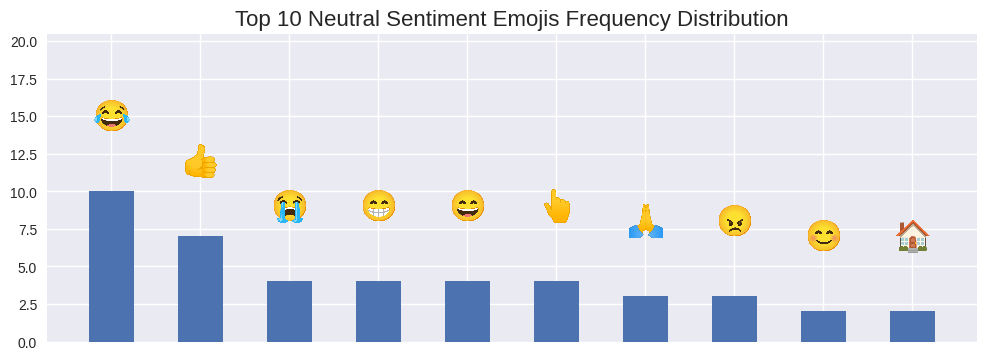

In [253]:
neutral_emoji_freqdist_df = freqdist_to_dataframe(fdist=emoji_counts, top_n=len(emoji_counts))

plot_emoji(
    neutral_emoji_freqdist_df['Word'].head(10),
    neutral_emoji_freqdist_df['Frequency'].head(10),
    'Neutral Sentiment')

## Emoji in Positive Sentiment

In [254]:
emoji_positive = df_sentiment['tweet'][df_sentiment['sentimen'] == 'positif'].apply(emoji_extract)

In [255]:
all_emojis = [emoji for emojis_list in emoji_positive for emoji in emojis_list]
emoji_symbols = [unicode_to_symbol_mapping.get(unicode, unicode) for unicode in all_emojis]
emoji_counts = Counter(emoji_symbols)

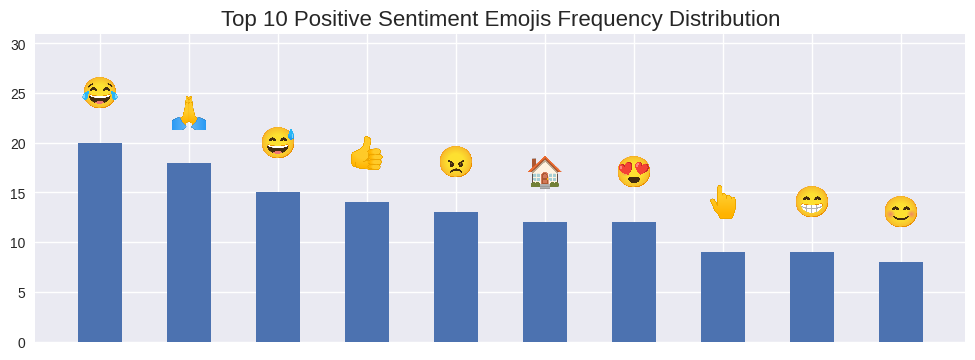

In [256]:
positive_emoji_freqdist_df = freqdist_to_dataframe(fdist=emoji_counts, top_n=len(emoji_counts))

plot_emoji(
    positive_emoji_freqdist_df['Word'].head(10),
    positive_emoji_freqdist_df['Frequency'].head(10),
    'Positive Sentiment')

## Emoji in Negative Sentiment

In [257]:
emoji_negative = df_sentiment['tweet'][df_sentiment['sentimen'] == 'negatif'].apply(emoji_extract)

In [258]:
all_emojis = [emoji for emojis_list in emoji_negative for emoji in emojis_list]
emoji_symbols = [unicode_to_symbol_mapping.get(unicode, unicode) for unicode in all_emojis]
emoji_counts = Counter(emoji_symbols)

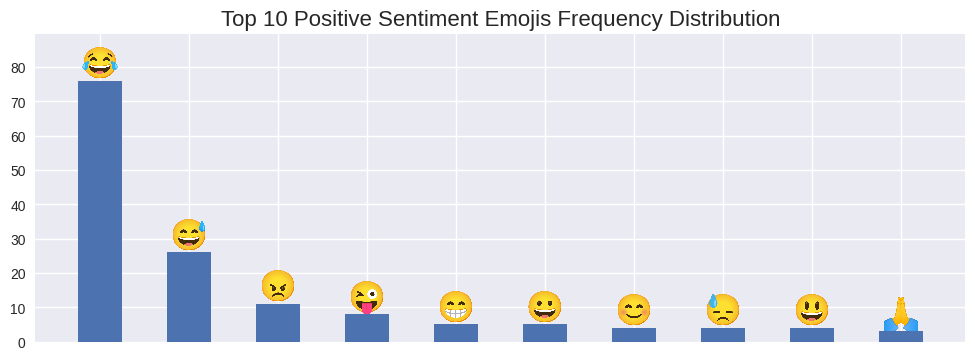

In [259]:
negative_emoji_freqdist_df = freqdist_to_dataframe(fdist=emoji_counts, top_n=len(emoji_counts))

plot_emoji(
    negative_emoji_freqdist_df['Word'].head(10),
    negative_emoji_freqdist_df['Frequency'].head(10),
    'Positive Sentiment')

# Data Cleaning

In [260]:
df_sentiment

Unnamed: 0 sentimen                                              tweet  \
0              0  negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1              1   netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2              2   netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3              3  positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4              4  negatif  Negara kita ngutang buat bngun infrastruktur y...   
...          ...      ...                                                ...   
1810        1810   netral  Negarawan sejati sll bangga dan mengedepankan ...   
1811        1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...   
1812        1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...   
1813        1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...   
1814        1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...   

      tweet_length  
0               20  
1               12  
2               11  
3               17  
4               35  
...            ...  
1810            13  
1811            12  
1812            14  
1813            10  
1814            18  

[1815 rows x 4 columns]

In [261]:
df_sentiment.drop('Unnamed: 0', axis=1, inplace=True)

In [262]:
df_sentiment

sentimen                                              tweet  tweet_length
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...            20
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...            12
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....            11
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...            17
4     negatif  Negara kita ngutang buat bngun infrastruktur y...            35
...       ...                                                ...           ...
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...            13
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...            12
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...            14
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...            10
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...            18

[1815 rows x 3 columns]

In [263]:
df_emoji.head()

Unnamed: 0 emoji-symbol meaning meaning-indo emoji-unicode  \
0           0            😄  smiley    tersenyum          ðŸ˜„   
1           1            😃  smiley    tersenyum          ðŸ˜ƒ   
2           2            😀  smiley    tersenyum          ðŸ˜€   
3           3            😊  smiley    tersenyum          ðŸ˜Š   
4           4            🙂   blush      memerah        â˜ºï¸   

                        emoji-name                          emoji-name-indo  
0  grinning face with smiling eyes  wajah menyeringai dengan mata tersenyum  
1      grinning face with big eyes      wajah menyeringai dengan mata besar  
2                    grinning face                        wajah menyeringai  
3   smiling face with smiling eyes    wajah tersenyum dengan mata tersenyum  
4            slightly smiling face             Wajah yang sedikit tersenyum

In [264]:
df_emoji.drop('Unnamed: 0', axis=1, inplace=True)

In [265]:
df_emoji.head()

emoji-symbol meaning meaning-indo emoji-unicode  \
0            😄  smiley    tersenyum          ðŸ˜„   
1            😃  smiley    tersenyum          ðŸ˜ƒ   
2            😀  smiley    tersenyum          ðŸ˜€   
3            😊  smiley    tersenyum          ðŸ˜Š   
4            🙂   blush      memerah        â˜ºï¸   

                        emoji-name                          emoji-name-indo  
0  grinning face with smiling eyes  wajah menyeringai dengan mata tersenyum  
1      grinning face with big eyes      wajah menyeringai dengan mata besar  
2                    grinning face                        wajah menyeringai  
3   smiling face with smiling eyes    wajah tersenyum dengan mata tersenyum  
4            slightly smiling face             Wajah yang sedikit tersenyum

# Pre-processing

In [266]:
# Some functions for preprocessing text

def replace_emoji_with_name(text):
    for emoji, name in emoji_dict.items():
        text = text.replace(emoji, f' {name} ')
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def cleaningText(text):
    text = re.sub(r'@', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'pic\.twitter\.com/[\w]+', '', text)  # remove pic.twitter.com links
    text = re.sub(r'\.+', ' ', text)

    text = text.replace('\n', ' ') # replace new line into space
    text = text.replace("'", "") # replace single quotes
    text = text.replace(',','') # replace commas
    text = text.replace(']','') # replace closing brackets
    text = text.replace('[','') # # replace opening brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringSlang(text):
    for word in text:
        if word in slang_words1.keys():
            text[text.index(word)] = slang_words1[word]
        elif word in slang_words2.keys():
            text[text.index(word)] = slang_words2[word]
        elif word in slang_words3.keys():
            text[text.index(word)] = slang_words3[word]
    return text

def remove_duplicate_letters(text):
    cleaned_data = []
    for row in text:
        if row != "assalamualaikum":
            row = re.sub(r'(.)\1+', r'\1', row)
        cleaned_data.append(row)
    return cleaned_data


# def filteringText(text): # Remove stopwors in a text
#     listStopwords = set(stopwords.words('indonesian'))
#     stop_words_to_preserve = ["tidak", "baik", "masa"]

#     filtered = []
#     for txt in text:
#         if txt not in listStopwords or txt in stop_words_to_preserve:
#             filtered.append(txt)

#     text = filtered
#     return text
def filteringText(row):
    listStopwords = set(stopwords.words('indonesian'))
    stop_words_to_preserve = ["tidak", "baik", "masa"]

    tweet = row['clean_tweet']
    sentiment = row['sentimen']

    filtered = []

    if sentiment == 'positif':
        for word in tweet:
            if word not in listStopwords :
                filtered.append(word)

    elif sentiment == 'netral':
            tidak_count = tweet.count('tidak')

            for word in tweet:
                if word == 'tidak':
                    total_tidak_deleted = tidak_count // 2

                    filtered = []
                    for i in range(total_tidak_deleted):
                        if total_tidak_deleted > 0:
                            filtered.append(word)
                elif word not in listStopwords:
                    filtered.append(word)

    elif sentiment == 'negatif':
            for word in tweet:
                if word == 'tidak':
                    filtered.append(word)
                elif word not in listStopwords :
                    filtered.append(word)

    return filtered


def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_text = []

    # text = [stemmer.stem(word) for word in text]

    for word in text:
        if word.lower() in ["asian", "basis", "solusi", "sufix"]:
            # Menyimpan kata-kata tersebut tanpa stemming
            stemmed_text.append(word)
        else:
            stemmed_text.append(stemmer.stem(word))

    return stemmed_text


lexicon_positive = dict()
with open('/content/drive/MyDrive/INDONESIA AI/Project1_Sentiment Analysis/Data/positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header = next(reader)
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
with open('/content/drive/MyDrive/INDONESIA AI/Project1_Sentiment Analysis/Data/negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header = next(reader)
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

all_lexicon = dict()
import csv
with open('/content/drive/MyDrive/INDONESIA AI/Project1_Sentiment Analysis/Data/lexicon-word-dataset.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header = next(reader)
    for row in reader:
        all_lexicon[row[0]] = int(row[1])

def checking_lexicon(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in all_lexicon):
            score = score + all_lexicon[word]
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positif'
    elif (score < 0):
        polarity = 'negatif'
    else:
        polarity = 'netral'
    return score, polarity


In [267]:
df_sentiment['clean_tweet'] = df_sentiment['tweet'].apply(replace_emoji_with_name)

df_sentiment

sentimen                                              tweet  \
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4     negatif  Negara kita ngutang buat bngun infrastruktur y...   
...       ...                                                ...   
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...   
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...   
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...   
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...   
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...   

      tweet_length                                        clean_tweet  
0               20  Kata @prabowo Indonesia tidak dihargai bangsa ...  
1               12  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...  
2               11  Di era Jokowi, ekonomi Indonesia semakin baik....  
3               17  Bagi Sumatera Selatan, Asian Games berdampak p...  
4               35  Negara kita ngutang buat bngun infrastruktur y...  
...            ...                                                ...  
1810            13  Negarawan sejati sll bangga dan mengedepankan ...  
1811            12  1. HRS ceramah di Damai Indonesiaku 2. Perekon...  
1812            14  Mari bangun bangsa dgn mendukung perekonomian ...  
1813            10  Bantu majukan perekonomian bangsa bersama Pak ...  
1814            18  Pak @jokowi mengubah cara pandang ekonomi. Kin...  

[1815 rows x 4 columns]

In [268]:
df_sentiment['clean_tweet'] = df_sentiment['clean_tweet'].apply(casefoldingText)

df_sentiment

sentimen                                              tweet  \
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4     negatif  Negara kita ngutang buat bngun infrastruktur y...   
...       ...                                                ...   
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...   
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...   
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...   
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...   
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...   

      tweet_length                                        clean_tweet  
0               20  kata @prabowo indonesia tidak dihargai bangsa ...  
1               12  batuan langka, tasbih jokowi hadiah dari habib...  
2               11  di era jokowi, ekonomi indonesia semakin baik....  
3               17  bagi sumatera selatan, asian games berdampak p...  
4               35  negara kita ngutang buat bngun infrastruktur y...  
...            ...                                                ...  
1810            13  negarawan sejati sll bangga dan mengedepankan ...  
1811            12  1. hrs ceramah di damai indonesiaku 2. perekon...  
1812            14  mari bangun bangsa dgn mendukung perekonomian ...  
1813            10  bantu majukan perekonomian bangsa bersama pak ...  
1814            18  pak @jokowi mengubah cara pandang ekonomi. kin...  

[1815 rows x 4 columns]

In [269]:
df_sentiment['clean_tweet'] = df_sentiment['clean_tweet'].apply(cleaningText)

df_sentiment


sentimen                                              tweet  \
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4     negatif  Negara kita ngutang buat bngun infrastruktur y...   
...       ...                                                ...   
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...   
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...   
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...   
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...   
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...   

      tweet_length                                        clean_tweet  
0               20  kata prabowo indonesia tidak dihargai bangsa a...  
1               12  batuan langka tasbih jokowi hadiah dari habib ...  
2               11       di era jokowi ekonomi indonesia semakin baik  
3               17  bagi sumatera selatan asian games berdampak pd...  
4               35  negara kita ngutang buat bngun infrastruktur y...  
...            ...                                                ...  
1810            13  negarawan sejati sll bangga dan mengedepankan ...  
1811            12  hrs ceramah di damai indonesiaku   perekonomia...  
1812            14  mari bangun bangsa dgn mendukung perekonomian ...  
1813            10  bantu majukan perekonomian bangsa bersama pak ...  
1814            18  pak jokowi mengubah cara pandang ekonomi  kini...  

[1815 rows x 4 columns]

In [270]:
df_sentiment['clean_tweet'] = df_sentiment['clean_tweet'].apply(tokenizingText)

df_sentiment

sentimen                                              tweet  \
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4     negatif  Negara kita ngutang buat bngun infrastruktur y...   
...       ...                                                ...   
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...   
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...   
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...   
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...   
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...   

      tweet_length                                        clean_tweet  
0               20  [kata, prabowo, indonesia, tidak, dihargai, ba...  
1               12  [batuan, langka, tasbih, jokowi, hadiah, dari,...  
2               11  [di, era, jokowi, ekonomi, indonesia, semakin,...  
3               17  [bagi, sumatera, selatan, asian, games, berdam...  
4               35  [negara, kita, ngutang, buat, bngun, infrastru...  
...            ...                                                ...  
1810            13  [negarawan, sejati, sll, bangga, dan, mengedep...  
1811            12  [hrs, ceramah, di, damai, indonesiaku, perekon...  
1812            14  [mari, bangun, bangsa, dgn, mendukung, perekon...  
1813            10  [bantu, majukan, perekonomian, bangsa, bersama...  
1814            18  [pak, jokowi, mengubah, cara, pandang, ekonomi...  

[1815 rows x 4 columns]

In [271]:
df_sentiment['clean_tweet'] = df_sentiment['clean_tweet'].apply(filteringSlang)

df_sentiment

sentimen                                              tweet  \
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4     negatif  Negara kita ngutang buat bngun infrastruktur y...   
...       ...                                                ...   
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...   
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...   
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...   
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...   
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...   

      tweet_length                                        clean_tweet  
0               20  [kata, prabowo, indonesia, tidak, dihargai, ba...  
1               12  [batuan, langka, tasbih, jokowi, hadiah, dari,...  
2               11  [di, era, jokowi, ekonomi, indonesia, semakin,...  
3               17  [bagi, sumatera, selatan, asian, games, berdam...  
4               35  [negara, kita, ngutang, buat, bangun, infrastr...  
...            ...                                                ...  
1810            13  [negarawan, sejati, selalu, bangga, dan, menge...  
1811            12  [harus, ceramah, di, damai, indonesiaku, perek...  
1812            14  [mari, bangun, bangsa, dengan, mendukung, pere...  
1813            10  [bantu, majukan, perekonomian, bangsa, bersama...  
1814            18  [pak, jokowi, mengubah, cara, pandang, ekonomi...  

[1815 rows x 4 columns]

In [272]:
df_sentiment['clean_tweet'] = df_sentiment['clean_tweet'].apply(remove_duplicate_letters)

df_sentiment

sentimen                                              tweet  \
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4     negatif  Negara kita ngutang buat bngun infrastruktur y...   
...       ...                                                ...   
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...   
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...   
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...   
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...   
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...   

      tweet_length                                        clean_tweet  
0               20  [kata, prabowo, indonesia, tidak, dihargai, ba...  
1               12  [batuan, langka, tasbih, jokowi, hadiah, dari,...  
2               11  [di, era, jokowi, ekonomi, indonesia, semakin,...  
3               17  [bagi, sumatera, selatan, asian, games, berdam...  
4               35  [negara, kita, ngutang, buat, bangun, infrastr...  
...            ...                                                ...  
1810            13  [negarawan, sejati, selalu, banga, dan, menged...  
1811            12  [harus, ceramah, di, damai, indonesiaku, perek...  
1812            14  [mari, bangun, bangsa, dengan, mendukung, pere...  
1813            10  [bantu, majukan, perekonomian, bangsa, bersama...  
1814            18  [pak, jokowi, mengubah, cara, pandang, ekonomi...  

[1815 rows x 4 columns]

In [273]:
# df_sentiment['clean_tweet'] = df_sentiment['clean_tweet'].apply(filteringText)
df_sentiment['clean_tweet'] = df_sentiment.apply(filteringText, axis=1)

df_sentiment

sentimen                                              tweet  \
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4     negatif  Negara kita ngutang buat bngun infrastruktur y...   
...       ...                                                ...   
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...   
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...   
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...   
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...   
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...   

      tweet_length                                        clean_tweet  
0               20  [prabowo, indonesia, tidak, dihargai, bangsa, ...  
1               12  [batuan, langka, tasbih, jokowi, hadiah, habib...  
2               11                  [era, jokowi, ekonomi, indonesia]  
3               17  [sumatera, selatan, asian, games, berdampak, e...  
4               35  [negara, ngutang, bangun, infrastruktur, dipak...  
...            ...                                                ...  
1810            13  [negarawan, sejati, banga, mengedepankan, harg...  
1811            12  [ceramah, damai, indonesiaku, perekonomian, me...  
1812            14  [mari, bangun, bangsa, mendukung, perekonomian...  
1813            10  [bantu, majukan, perekonomian, bangsa, jokowi,...  
1814            18  [jokowi, mengubah, pandang, ekonomi, orang, te...  

[1815 rows x 4 columns]

In [274]:
df_sentiment['clean_tweet'] = df_sentiment['clean_tweet'].apply(stemmingText)

df_sentiment

sentimen                                              tweet  \
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4     negatif  Negara kita ngutang buat bngun infrastruktur y...   
...       ...                                                ...   
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...   
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...   
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...   
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...   
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...   

      tweet_length                                        clean_tweet  
0               20  [prabowo, indonesia, tidak, harga, bangsa, asi...  
1               12  [batu, langka, tasbih, jokowi, hadiah, habib, ...  
2               11                  [era, jokowi, ekonomi, indonesia]  
3               17  [sumatera, selatan, asian, games, dampak, ekon...  
4               35  [negara, ngutang, bangun, infrastruktur, pakai...  
...            ...                                                ...  
1810            13  [negarawan, sejati, banga, depan, harga, bangs...  
1811            12         [ceramah, damai, indonesia, ekonomi, baik]  
1812            14  [mari, bangun, bangsa, dukung, ekonomi, negara...  
1813            10      [bantu, maju, ekonomi, bangsa, jokowi, yuk, ]  
1814            18  [jokowi, ubah, pandang, ekonomi, orang, hubung...  

[1815 rows x 4 columns]

In [275]:
results = df_sentiment['clean_tweet'].apply(checking_lexicon)

results = list(zip(*results))

df_sentiment['polarity_score'] = results[0]
df_sentiment['polarity'] = results[1]

print(df_sentiment['polarity'].value_counts())

negatif    1272
positif     448
netral       95
Name: polarity, dtype: int64


In [276]:
df_sentiment

sentimen                                              tweet  \
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4     negatif  Negara kita ngutang buat bngun infrastruktur y...   
...       ...                                                ...   
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...   
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...   
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...   
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...   
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...   

      tweet_length                                        clean_tweet  \
0               20  [prabowo, indonesia, tidak, harga, bangsa, asi...   
1               12  [batu, langka, tasbih, jokowi, hadiah, habib, ...   
2               11                  [era, jokowi, ekonomi, indonesia]   
3               17  [sumatera, selatan, asian, games, dampak, ekon...   
4               35  [negara, ngutang, bangun, infrastruktur, pakai...   
...            ...                                                ...   
1810            13  [negarawan, sejati, banga, depan, harga, bangs...   
1811            12         [ceramah, damai, indonesia, ekonomi, baik]   
1812            14  [mari, bangun, bangsa, dukung, ekonomi, negara...   
1813            10      [bantu, maju, ekonomi, bangsa, jokowi, yuk, ]   
1814            18  [jokowi, ubah, pandang, ekonomi, orang, hubung...   

      polarity_score polarity  
0                 -3  negatif  
1                 -8  negatif  
2                  0   netral  
3                 -5  negatif  
4                 -7  negatif  
...              ...      ...  
1810              20  positif  
1811               1  positif  
1812              22  positif  
1813               3  positif  
1814               9  positif  

[1815 rows x 6 columns]

# Save Cleaned Data to csv

In [277]:
df_sentiment['clean_tweet_sentence']= [' '.join(tokens) for tokens in df_sentiment['clean_tweet']]

In [278]:
df_sentiment

sentimen                                              tweet  \
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4     negatif  Negara kita ngutang buat bngun infrastruktur y...   
...       ...                                                ...   
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...   
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...   
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...   
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...   
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...   

      tweet_length                                        clean_tweet  \
0               20  [prabowo, indonesia, tidak, harga, bangsa, asi...   
1               12  [batu, langka, tasbih, jokowi, hadiah, habib, ...   
2               11                  [era, jokowi, ekonomi, indonesia]   
3               17  [sumatera, selatan, asian, games, dampak, ekon...   
4               35  [negara, ngutang, bangun, infrastruktur, pakai...   
...            ...                                                ...   
1810            13  [negarawan, sejati, banga, depan, harga, bangs...   
1811            12         [ceramah, damai, indonesia, ekonomi, baik]   
1812            14  [mari, bangun, bangsa, dukung, ekonomi, negara...   
1813            10      [bantu, maju, ekonomi, bangsa, jokowi, yuk, ]   
1814            18  [jokowi, ubah, pandang, ekonomi, orang, hubung...   

      polarity_score polarity  \
0                 -3  negatif   
1                 -8  negatif   
2                  0   netral   
3                 -5  negatif   
4                 -7  negatif   
...              ...      ...   
1810              20  positif   
1811               1  positif   
1812              22  positif   
1813               3  positif   
1814               9  positif   

                                   clean_tweet_sentence  
0     prabowo indonesia tidak harga bangsa asing ber...  
1     batu langka tasbih jokowi hadiah habib luthfi ...  
2                          era jokowi ekonomi indonesia  
3     sumatera selatan asian games dampak ekonomi la...  
4     negara ngutang bangun infrastruktur pakai masy...  
...                                                 ...  
1810   negarawan sejati banga depan harga bangsa daulat  
1811               ceramah damai indonesia ekonomi baik  
1812  mari bangun bangsa dukung ekonomi negara jokow...  
1813              bantu maju ekonomi bangsa jokowi yuk   
1814  jokowi ubah pandang ekonomi orang hubung sehin...  

[1815 rows x 7 columns]

In [279]:
df_sentiment.to_csv('/content/drive/MyDrive/INDONESIA AI/Project1_Sentiment Analysis/df_tweet_cleaned.csv')

# Load Cleaned Data

In [280]:
path = '/content/drive/MyDrive/INDONESIA AI/Project1_Sentiment Analysis/df_tweet_cleaned.csv'
df_sentiment = pd.read_csv(path)

In [281]:
df_sentiment.drop('Unnamed: 0', axis=1, inplace=True)

df_sentiment

sentimen                                              tweet  \
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4     negatif  Negara kita ngutang buat bngun infrastruktur y...   
...       ...                                                ...   
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...   
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...   
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...   
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...   
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...   

      tweet_length                                        clean_tweet  \
0               20  ['prabowo', 'indonesia', 'tidak', 'harga', 'ba...   
1               12  ['batu', 'langka', 'tasbih', 'jokowi', 'hadiah...   
2               11          ['era', 'jokowi', 'ekonomi', 'indonesia']   
3               17  ['sumatera', 'selatan', 'asian', 'games', 'dam...   
4               35  ['negara', 'ngutang', 'bangun', 'infrastruktur...   
...            ...                                                ...   
1810            13  ['negarawan', 'sejati', 'banga', 'depan', 'har...   
1811            12  ['ceramah', 'damai', 'indonesia', 'ekonomi', '...   
1812            14  ['mari', 'bangun', 'bangsa', 'dukung', 'ekonom...   
1813            10  ['bantu', 'maju', 'ekonomi', 'bangsa', 'jokowi...   
1814            18  ['jokowi', 'ubah', 'pandang', 'ekonomi', 'oran...   

      polarity_score polarity  \
0                 -3  negatif   
1                 -8  negatif   
2                  0   netral   
3                 -5  negatif   
4                 -7  negatif   
...              ...      ...   
1810              20  positif   
1811               1  positif   
1812              22  positif   
1813               3  positif   
1814               9  positif   

                                   clean_tweet_sentence  
0     prabowo indonesia tidak harga bangsa asing ber...  
1     batu langka tasbih jokowi hadiah habib luthfi ...  
2                          era jokowi ekonomi indonesia  
3     sumatera selatan asian games dampak ekonomi la...  
4     negara ngutang bangun infrastruktur pakai masy...  
...                                                 ...  
1810   negarawan sejati banga depan harga bangsa daulat  
1811               ceramah damai indonesia ekonomi baik  
1812  mari bangun bangsa dukung ekonomi negara jokow...  
1813              bantu maju ekonomi bangsa jokowi yuk   
1814  jokowi ubah pandang ekonomi orang hubung sehin...  

[1815 rows x 7 columns]

In [287]:
df_sentiment['clean_tweet_sentence'].values

array(['prabowo indonesia tidak harga bangsa asing berita titik isu bohong buat kuasa iya rockygerung lidah ',
       'batu langka tasbih jokowi hadiah habib luthfi harga mercy',
       'era jokowi ekonomi indonesia', ...,
       'mari bangun bangsa dukung ekonomi negara jokowi ayo kerja ',
       'bantu maju ekonomi bangsa jokowi yuk ',
       'jokowi ubah pandang ekonomi orang hubung sehinga indonesia produktif efisien'],
      dtype=object)

In [288]:
df_sentiment['clean_tweet'].values

array(["['prabowo', 'indonesia', 'tidak', 'harga', 'bangsa', 'asing', 'berita', 'titik', 'isu bohong', 'buat', 'kuasa', 'iya', 'rockygerung', 'lidah', '']",
       "['batu', 'langka', 'tasbih', 'jokowi', 'hadiah', 'habib', 'luthfi', 'harga', 'mercy']",
       "['era', 'jokowi', 'ekonomi', 'indonesia']", ...,
       "['mari', 'bangun', 'bangsa', 'dukung', 'ekonomi', 'negara', 'jokowi', 'ayo', 'kerja', '']",
       "['bantu', 'maju', 'ekonomi', 'bangsa', 'jokowi', 'yuk', '']",
       "['jokowi', 'ubah', 'pandang', 'ekonomi', 'orang', 'hubung', 'sehinga', 'indonesia', 'produktif', 'efisien']"],
      dtype=object)

In [289]:
df_sentiment['tweet'].values

array(['Kata @prabowo Indonesia tidak dihargai bangsa asing!   Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â\xa0â€¦',
       'Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy?  http://dlvr.it/R2pvZVÂ\xa0',
       'Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp',
       ...,
       'Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja!  https://twitter.com/KaskusLoker/status/1111643312241295363Â\xa0â€¦',
       'Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk!  https://twitter.com/BKNSquare/status/1113655944955588610Â\xa0â€¦',
       'Pak @jokowi mengubah cara pandang ekonomi. Kini semua orang terhubung, sehingga Indonesia menjadi lebih produktif dan efisien. #MenyatuPutihJokowi'],
      dtype=object)

# Check the number of occurrences of words and wordcloud after Preprocessing

## All Data

### Freqdist

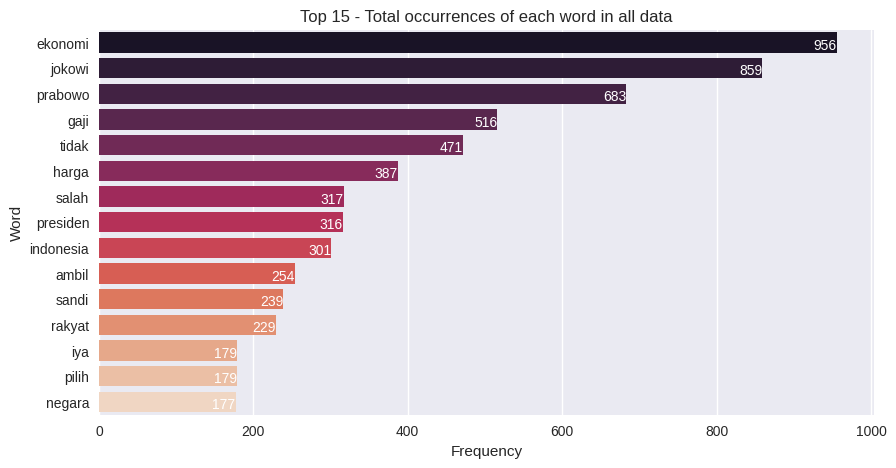

In [290]:
all_freqdist = calculate_freqdist('all', df_sentiment['clean_tweet_sentence'].astype(str))

all_freqdist_df = freqdist_to_dataframe(all_freqdist)

plot_freqdist(all_freqdist_df, 'Top 15 - Total occurrences of each word in all data')

### WordCloud

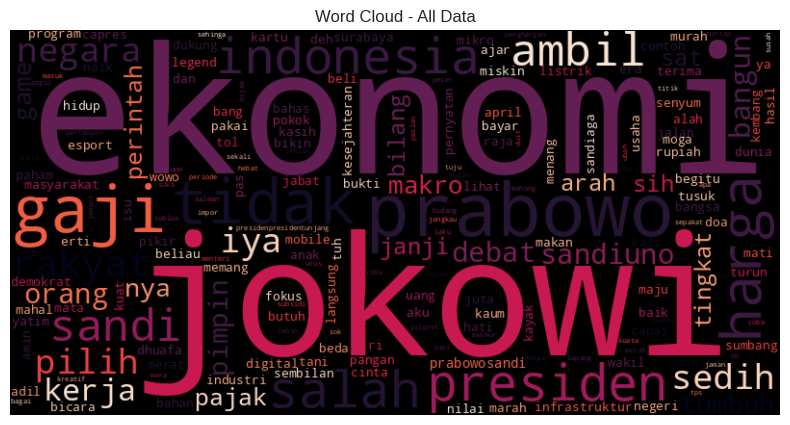

In [292]:
create_wordcloud('all', 'Word Cloud - All Data', 'rocket', df_sentiment['clean_tweet_sentence'].astype(str))

## Neutral Sentiment Data

### Freqdist

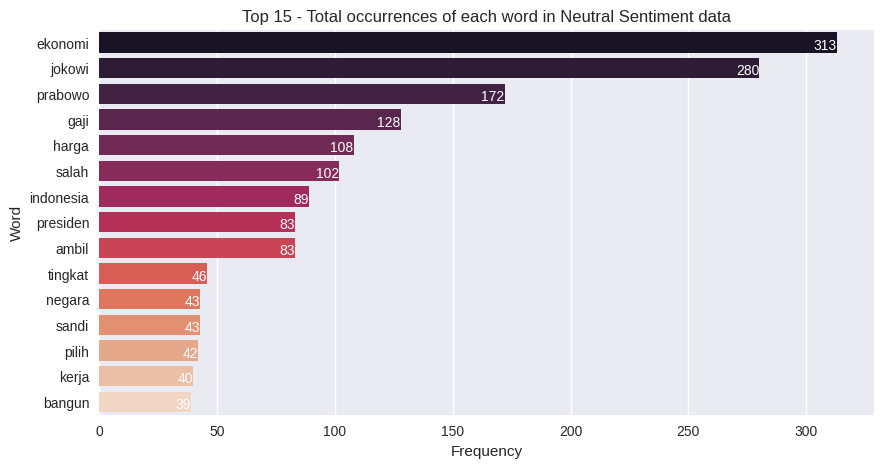

In [302]:
neutral_freqdist = calculate_freqdist('netral', df_sentiment['clean_tweet_sentence'].astype(str))

neutral_freqdist_df = freqdist_to_dataframe(neutral_freqdist)

plot_freqdist(neutral_freqdist_df, 'Top 15 - Total occurrences of each word in Neutral Sentiment data')

### WordCloud

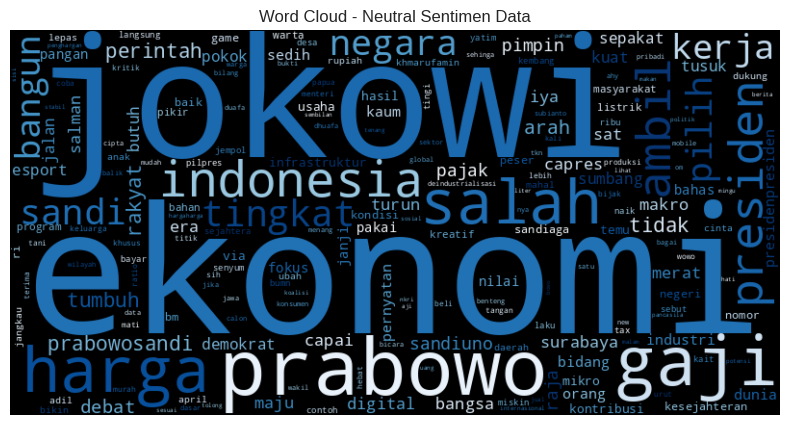

In [295]:
create_wordcloud('netral', 'Word Cloud - Neutral Sentimen Data', 'Blues', df_sentiment['clean_tweet_sentence'].astype(str))

## Positive Sentiment Data

### Freqdist

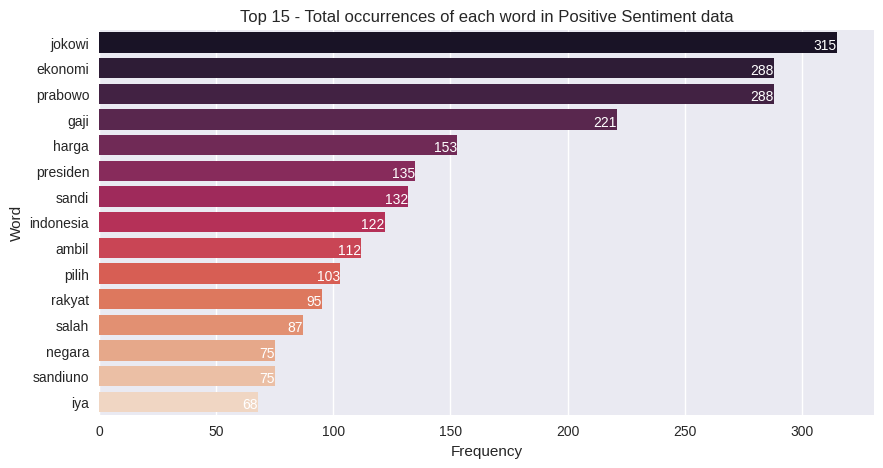

In [300]:
positive_freqdist = calculate_freqdist('positif', df_sentiment['clean_tweet_sentence'])

positive_freqdist_df = freqdist_to_dataframe(positive_freqdist)

plot_freqdist(positive_freqdist_df, 'Top 15 - Total occurrences of each word in Positive Sentiment data')

### WordCloud

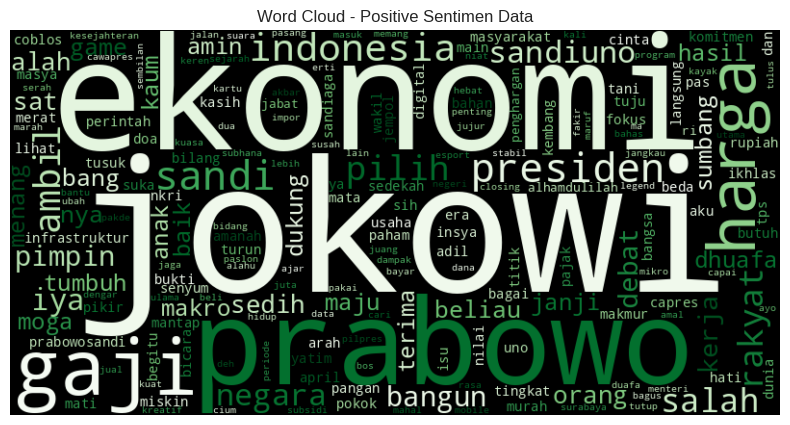

In [297]:
create_wordcloud('positif', 'Word Cloud - Positive Sentimen Data', 'Greens', df_sentiment['clean_tweet_sentence'])

## Negative Sentiment Data

### Freqdist

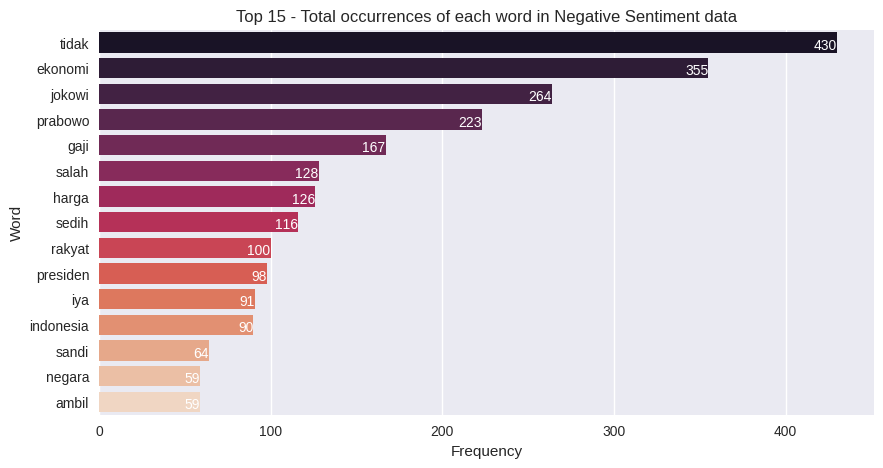

In [298]:
negative_freqdist = calculate_freqdist('negatif', df_sentiment['clean_tweet_sentence'])

negative_freqdist_df = freqdist_to_dataframe(negative_freqdist)

plot_freqdist(negative_freqdist_df, 'Top 15 - Total occurrences of each word in Negative Sentiment data')

### WordCloud

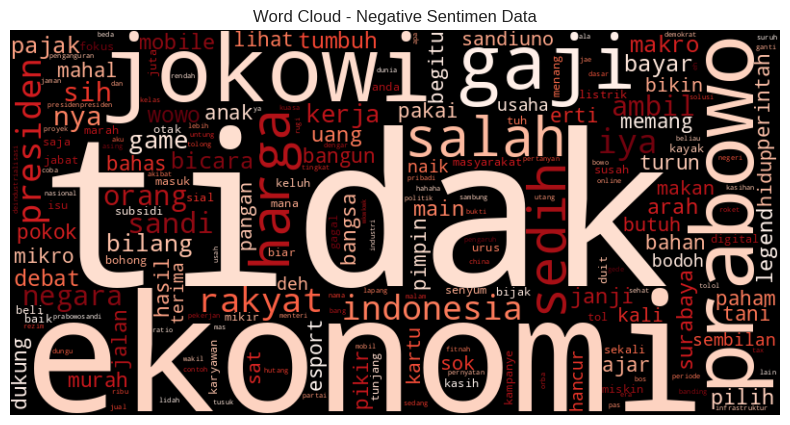

In [299]:
create_wordcloud('negatif', 'Word Cloud - Negative Sentimen Data', 'Reds', df_sentiment['clean_tweet_sentence'])

# Split the data for X and y

In [305]:
X = df_sentiment['clean_tweet_sentence'].astype(str)
y = df_sentiment['sentimen']

# Vectorization

## X

### X with Tokenizer Keras

In [306]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 1000 # panjang loopin

tok = Tokenizer(num_words=max_words)

tok.fit_on_texts(X.values)

X_seq = tok.texts_to_sequences(X.values)

max_len = max([len(seq) for seq in X_seq])
X_seq = pad_sequences(X_seq, maxlen=max_len)

X_seq.shape

(1815, 32)

## Y

In [307]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical


label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y.values)
# print(integer_encoded)

# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

# ### One hot encoding
# onehot_encoder = OneHotEncoder(sparse=False)
# y_le = onehot_encoder.fit_transform(integer_encoded)


y_le = to_categorical(integer_encoded, num_classes=3)
print(y_le.shape)


(1815, 3)


# Split the Data into Train and Test

In [308]:
X_train_seq, X_test_seq, y_train_le, y_test_le = train_test_split(X_seq, y_le, test_size = 0.2, random_state = 42)

# Build the Model LSTM

In [372]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.regularizers import l1

# define RNN
def RNN():
    inputs = Input(name='inputs', shape=X_train_seq.shape[1])

    layer = Embedding(max_words, 50, input_length=max_len)(inputs)

    layer = Dropout(0.5)(layer)
    layer = LSTM(128)(layer)

    layer = Dense(256, name='FC1')(layer)

    layer = Activation('relu')(layer)

    layer = Dropout(0.5)(layer)

    layer = Dense(3, name='out_layer')(layer)

    layer = Activation('softmax')(layer)

    model = Model(inputs=inputs, outputs=layer)

    return model

In [373]:
from keras.optimizers import Adam, RMSprop, SGD

model = RNN()

# Menampilkan ringkasan (summary) dari model, termasuk informasi tentang setiap lapisan dan parameter
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 32)]              0         
                                                                 
 embedding_13 (Embedding)    (None, 32, 50)            50000     
                                                                 
 dropout_13 (Dropout)        (None, 32, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 128)               91648     
                                                                 
 FC1 (Dense)                 (None, 256)               33024     
                                                                 
 activation_22 (Activation)  (None, 256)               0         
                                                                 
 dropout_14 (Dropout)        (None, 256)               0  

In [374]:
from keras.callbacks import EarlyStopping

history = model.fit(X_train_seq, y_train_le, batch_size=64, epochs=50, validation_data=(X_test_seq, y_test_le), callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/50
23/23 [==============================] - 5s 125ms/step - loss: 1.0708 - accuracy: 0.3994 - val_loss: 1.0232 - val_accuracy: 0.4380
Epoch 2/50
23/23 [==============================] - 3s 124ms/step - loss: 0.9753 - accuracy: 0.4835 - val_loss: 0.9716 - val_accuracy: 0.5152
Epoch 3/50
23/23 [==============================] - 3s 121ms/step - loss: 0.9052 - accuracy: 0.5689 - val_loss: 0.8981 - val_accuracy: 0.5537
Epoch 4/50
23/23 [==============================] - 2s 71ms/step - loss: 0.7765 - accuracy: 0.6715 - val_loss: 0.8099 - val_accuracy: 0.6446
Epoch 5/50
23/23 [==============================] - 2s 73ms/step - loss: 0.6369 - accuracy: 0.7314 - val_loss: 0.7446 - val_accuracy: 0.6777
Epoch 6/50
23/23 [==============================] - 2s 71ms/step - loss: 0.5321 - accuracy: 0.7955 - val_loss: 0.7598 - val_accuracy: 0.6860


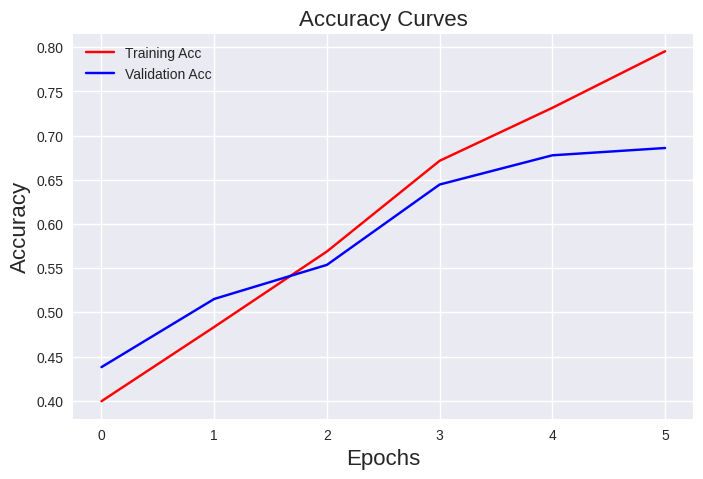

In [375]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

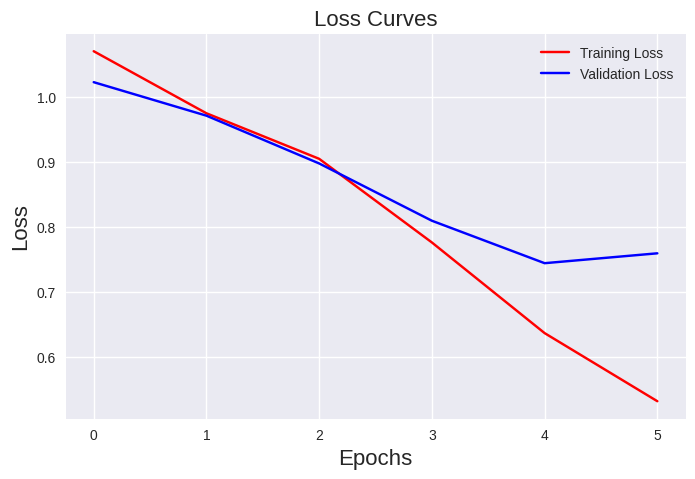

In [376]:
plt.figure(figsize=[8,5])
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

In [377]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = model.predict(X_test_seq)

y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test_le, y_pred))

# y_pred

12/12 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       115
           1       0.66      0.65      0.66       118
           2       0.72      0.52      0.60       130

   micro avg       0.72      0.63      0.67       363
   macro avg       0.72      0.64      0.67       363
weighted avg       0.72      0.63      0.67       363
 samples avg       0.63      0.63      0.63       363



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

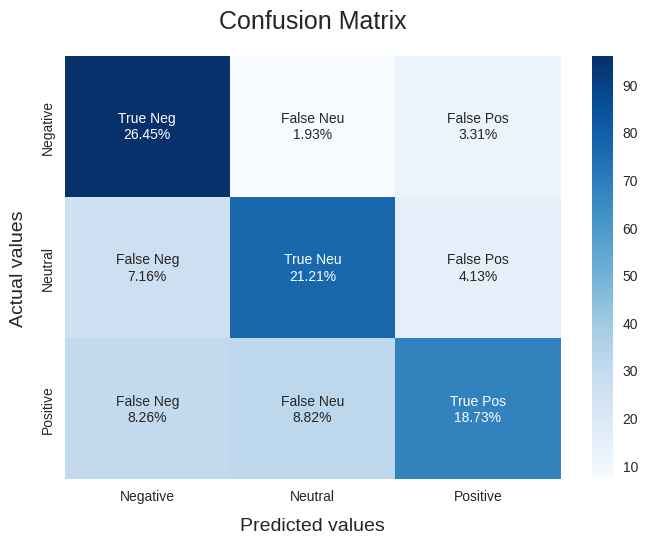

In [378]:
cf_matrix = confusion_matrix(y_test_le.argmax(axis=1), y_pred.argmax(axis=1))

categories  = ['Negative', 'Neutral', 'Positive']
group_names = ['True Neg', 'False Neu', 'False Pos', 'False Neg', 'True Neu', 'False Pos', 'False Neg', 'False Neu', 'True Pos',]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(3,3)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Hyperparameter with Optuna

In [329]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.7 MB/s eta 0:00:00


In [384]:
import optuna
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling1D
from keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1

# Fungsi untuk objektif yang akan dioptimalkan oleh Optuna
def objective(trial):

    # Membuat model Sequential
    model = Sequential()

    # Menentukan hyperparameter yang akan dioptimalkan
    n_units = trial.suggest_int('n_units', 16, 128, 16)
    n_layers = trial.suggest_int('n_layers', 16, 128, 16)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.0001, 0.1)
    embedding_dim = trial.suggest_int('embedding_dim', 16, 128, 16)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
    l1_reg = trial.suggest_loguniform('l1_reg', 1e-5, 1e-1)

    # Menambahkan lapisan Embedding ke dalam model
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

    # Menambahkan lapisan LSTM ke dalam model
    # for i in range(n_layers):
    model.add(Dropout(dropout_rate))
    model.add(LSTM(n_units, return_sequences=True))
    model.add(Dense(n_layers, activation='relu', kernel_regularizer=l1(l1_reg)))
    model.add(Dropout(dropout_rate))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(3, activation='softmax'))

    # Kompilasi model dengan optimizer Adam
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    # Menambahkan trial untuk epochs dan batch size
    epochs = trial.suggest_int('epochs', 5, 30)
    batch_size = trial.suggest_int('batch_size', 16, 128)

    # Pelatihan model
    history = model.fit(X_train_seq, y_train_le, validation_data=(X_test_seq, y_test_le), epochs=epochs, batch_size=batch_size, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

    # Menghitung skor validasi
    val_loss = history.history['val_accuracy'][-1]

    return val_loss

In [385]:

# Membuat objek studi Optuna
study = optuna.create_study(direction='maximize')


[I 2023-11-12 07:57:19,911] A new study created in memory with name: no-name-e7f40ed6-45bd-4c8a-bcb1-743d322793a8


In [386]:
# Mulai tuning hyperparameter
study.optimize(objective, n_trials=5)

<ipython-input-384-7fa5694a38fe>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.0001, 0.1)
<ipython-input-384-7fa5694a38fe>:24: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
<ipython-input-384-7fa5694a38fe>:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l1_reg = trial.suggest_loguniform('l1_reg', 1e-5, 1e-1)


Epoch 1/21
40/40 [==============================] - 6s 63ms/step - loss: 1.1785 - accuracy: 0.4242 - val_loss: 1.1603 - val_accuracy: 0.3168
Epoch 2/21
40/40 [==============================] - 2s 46ms/step - loss: 1.1004 - accuracy: 0.4897 - val_loss: 1.0754 - val_accuracy: 0.4738
Epoch 3/21
40/40 [==============================] - 2s 63ms/step - loss: 0.9665 - accuracy: 0.5723 - val_loss: 0.9475 - val_accuracy: 0.5813
Epoch 4/21
40/40 [==============================] - 4s 93ms/step - loss: 0.8394 - accuracy: 0.6687 - val_loss: 0.9000 - val_accuracy: 0.6116
Epoch 5/21
40/40 [==============================] - 4s 93ms/step - loss: 0.7466 - accuracy: 0.7183 - val_loss: 0.8805 - val_accuracy: 0.6226
Epoch 6/21
40/40 [==============================] - 4s 98ms/step - loss: 0.6838 - accuracy: 0.7445 - val_loss: 0.8742 - val_accuracy: 0.6667
Epoch 7/21
40/40 [==============================] - 3s 63ms/step - loss: 0.6021 - accuracy: 0.7982 - val_loss: 1.1364 - val_accuracy: 0.6226


[I 2023-11-12 07:57:46,890] Trial 0 finished with value: 0.6225895285606384 and parameters: {'n_units': 112, 'n_layers': 16, 'learning_rate': 0.0010007079713487564, 'embedding_dim': 64, 'dropout_rate': 0.22198187461041918, 'l1_reg': 0.0005572175595262278, 'epochs': 21, 'batch_size': 37}. Best is trial 0 with value: 0.6225895285606384.


Epoch 1/11
16/16 [==============================] - 4s 105ms/step - loss: 11.2991 - accuracy: 0.3430 - val_loss: 10.6366 - val_accuracy: 0.4545
Epoch 2/11
16/16 [==============================] - 1s 70ms/step - loss: 10.0883 - accuracy: 0.4580 - val_loss: 9.4675 - val_accuracy: 0.4711
Epoch 3/11
16/16 [==============================] - 1s 92ms/step - loss: 8.9455 - accuracy: 0.5007 - val_loss: 8.3587 - val_accuracy: 0.5152
Epoch 4/11
16/16 [==============================] - 2s 112ms/step - loss: 7.8440 - accuracy: 0.4807 - val_loss: 7.3148 - val_accuracy: 0.4986
Epoch 5/11
16/16 [==============================] - 2s 118ms/step - loss: 6.8382 - accuracy: 0.5448 - val_loss: 6.3673 - val_accuracy: 0.4711
Epoch 6/11
16/16 [==============================] - 2s 124ms/step - loss: 5.9074 - accuracy: 0.5737 - val_loss: 5.4715 - val_accuracy: 0.5813
Epoch 7/11
16/16 [==============================] - 1s 90ms/step - loss: 5.0374 - accuracy: 0.6267 - val_loss: 4.6831 - val_accuracy: 0.5399
Epoch 

[I 2023-11-12 07:58:10,048] Trial 1 finished with value: 0.6308540105819702 and parameters: {'n_units': 96, 'n_layers': 16, 'learning_rate': 0.0008473172572905465, 'embedding_dim': 48, 'dropout_rate': 0.3332497008154872, 'l1_reg': 0.061365278471293194, 'epochs': 11, 'batch_size': 92}. Best is trial 1 with value: 0.6308540105819702.


Epoch 1/12
22/22 [==============================] - 7s 133ms/step - loss: 2.6456 - accuracy: 0.3815 - val_loss: 2.3948 - val_accuracy: 0.3857
Epoch 2/12
22/22 [==============================] - 1s 64ms/step - loss: 2.1712 - accuracy: 0.4304 - val_loss: 1.9427 - val_accuracy: 0.4628
Epoch 3/12
22/22 [==============================] - 1s 49ms/step - loss: 1.7482 - accuracy: 0.5296 - val_loss: 1.6097 - val_accuracy: 0.4876
Epoch 4/12
22/22 [==============================] - 1s 53ms/step - loss: 1.3916 - accuracy: 0.6433 - val_loss: 1.3247 - val_accuracy: 0.5813
Epoch 5/12
22/22 [==============================] - 1s 52ms/step - loss: 1.0938 - accuracy: 0.7204 - val_loss: 1.1239 - val_accuracy: 0.6474
Epoch 6/12
22/22 [==============================] - 1s 49ms/step - loss: 0.8765 - accuracy: 0.7713 - val_loss: 1.0407 - val_accuracy: 0.6722
Epoch 7/12
22/22 [==============================] - 1s 49ms/step - loss: 0.7339 - accuracy: 0.8106 - val_loss: 1.0366 - val_accuracy: 0.6887
Epoch 8/12
2

[I 2023-11-12 07:58:26,207] Trial 2 finished with value: 0.6942148804664612 and parameters: {'n_units': 64, 'n_layers': 112, 'learning_rate': 0.0012235476165355225, 'embedding_dim': 96, 'dropout_rate': 0.0318236963944028, 'l1_reg': 0.002703441231264879, 'epochs': 12, 'batch_size': 67}. Best is trial 2 with value: 0.6942148804664612.


Epoch 1/21
13/13 [==============================] - 4s 110ms/step - loss: 17.1615 - accuracy: 0.3712 - val_loss: 15.9896 - val_accuracy: 0.3554
Epoch 2/21
13/13 [==============================] - 1s 66ms/step - loss: 15.1474 - accuracy: 0.4029 - val_loss: 14.0576 - val_accuracy: 0.4187
Epoch 3/21
13/13 [==============================] - 1s 65ms/step - loss: 13.2532 - accuracy: 0.4718 - val_loss: 12.2265 - val_accuracy: 0.4518
Epoch 4/21
13/13 [==============================] - 1s 67ms/step - loss: 11.4692 - accuracy: 0.5041 - val_loss: 10.5493 - val_accuracy: 0.5179
Epoch 5/21
13/13 [==============================] - 1s 68ms/step - loss: 9.8337 - accuracy: 0.5517 - val_loss: 8.9891 - val_accuracy: 0.5813
Epoch 6/21
13/13 [==============================] - 1s 111ms/step - loss: 8.3163 - accuracy: 0.6288 - val_loss: 7.5580 - val_accuracy: 0.5702
Epoch 7/21
13/13 [==============================] - 1s 110ms/step - loss: 6.9370 - accuracy: 0.6770 - val_loss: 6.2816 - val_accuracy: 0.6088
Ep

[I 2023-11-12 07:58:59,203] Trial 3 finished with value: 0.6225895285606384 and parameters: {'n_units': 64, 'n_layers': 48, 'learning_rate': 0.001129280115143741, 'embedding_dim': 96, 'dropout_rate': 0.39724827767168913, 'l1_reg': 0.04772543193671768, 'epochs': 21, 'batch_size': 120}. Best is trial 2 with value: 0.6942148804664612.


Epoch 1/15
12/12 [==============================] - 5s 178ms/step - loss: 1.1358 - accuracy: 0.3251 - val_loss: 1.1336 - val_accuracy: 0.3333
Epoch 2/15
12/12 [==============================] - 1s 107ms/step - loss: 1.1275 - accuracy: 0.3747 - val_loss: 1.1277 - val_accuracy: 0.3416
Epoch 3/15
12/12 [==============================] - 1s 74ms/step - loss: 1.1182 - accuracy: 0.3609 - val_loss: 1.1162 - val_accuracy: 0.4050
Epoch 4/15
12/12 [==============================] - 1s 58ms/step - loss: 1.0950 - accuracy: 0.4318 - val_loss: 1.0799 - val_accuracy: 0.4518
Epoch 5/15
12/12 [==============================] - 1s 58ms/step - loss: 1.0434 - accuracy: 0.4828 - val_loss: 1.0556 - val_accuracy: 0.4490
Epoch 6/15
12/12 [==============================] - 1s 67ms/step - loss: 1.0113 - accuracy: 0.5041 - val_loss: 1.0617 - val_accuracy: 0.4518


[I 2023-11-12 07:59:09,346] Trial 4 finished with value: 0.45179063081741333 and parameters: {'n_units': 80, 'n_layers': 32, 'learning_rate': 0.0007718811417339662, 'embedding_dim': 32, 'dropout_rate': 0.1797876649922195, 'l1_reg': 0.00013519956075311426, 'epochs': 15, 'batch_size': 121}. Best is trial 2 with value: 0.6942148804664612.


In [387]:
trial = study.best_trial

In [408]:
print('Val_acc: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Val_acc: 0.6942148804664612
Best hyperparameters: {'n_units': 64, 'n_layers': 112, 'learning_rate': 0.0012235476165355225, 'embedding_dim': 96, 'dropout_rate': 0.0318236963944028, 'l1_reg': 0.002703441231264879, 'epochs': 12, 'batch_size': 67}


In [409]:
trial.params['n_units']

_n_units = trial.params['n_units']
_n_layers = trial.params['n_layers']
_embedding_dim = trial.params['embedding_dim']
_dropout_rate = trial.params['dropout_rate']
_regulazer = trial.params['l1_reg']
_epochs = trial.params['epochs']
_batch_size = trial.params['batch_size']
_learning_rate = trial.params['learning_rate']

_learning_rate

0.0012235476165355225

In [410]:
def lstm():
  model = Sequential()
  model.add(Embedding(input_dim=max_words, output_dim=_embedding_dim, input_length=max_len))
  model.add(Dropout(_dropout_rate))
  model.add(LSTM(_n_units, return_sequences=True))
  model.add(Dense(_n_layers, activation='relu', kernel_regularizer=l1(_regulazer)))
  model.add(Dropout(_dropout_rate))
  model.add(GlobalAveragePooling1D())
  model.add(Dense(3, activation='softmax'))

  return model

In [411]:
from keras.optimizers import Adam, RMSprop, SGD

model_ = lstm()

# Menampilkan ringkasan (summary) dari model, termasuk informasi tentang setiap lapisan dan parameter
model_.summary()

model_.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=_learning_rate), metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 32, 96)            96000     
                                                                 
 dropout_27 (Dropout)        (None, 32, 96)            0         
                                                                 
 lstm_20 (LSTM)              (None, 32, 64)            41216     
                                                                 
 dense_12 (Dense)            (None, 32, 112)           7280      
                                                                 
 dropout_28 (Dropout)        (None, 32, 112)           0         
                                                                 
 global_average_pooling1d_6  (None, 112)               0         
  (GlobalAveragePooling1D)                                       
                                                      

In [412]:
from keras.callbacks import EarlyStopping

history = model_.fit(X_train_seq, y_train_le, batch_size=_batch_size, epochs=_epochs, validation_data=(X_test_seq, y_test_le), callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/12
22/22 [==============================] - 5s 99ms/step - loss: 2.6664 - accuracy: 0.3574 - val_loss: 2.4111 - val_accuracy: 0.4242
Epoch 2/12
22/22 [==============================] - 2s 92ms/step - loss: 2.1801 - accuracy: 0.4621 - val_loss: 1.9653 - val_accuracy: 0.4490
Epoch 3/12
22/22 [==============================] - 2s 92ms/step - loss: 1.7460 - accuracy: 0.5592 - val_loss: 1.5903 - val_accuracy: 0.5620
Epoch 4/12
22/22 [==============================] - 2s 93ms/step - loss: 1.3587 - accuracy: 0.6784 - val_loss: 1.3065 - val_accuracy: 0.6419
Epoch 5/12
22/22 [==============================] - 1s 57ms/step - loss: 1.0781 - accuracy: 0.7362 - val_loss: 1.1287 - val_accuracy: 0.6529
Epoch 6/12
22/22 [==============================] - 1s 51ms/step - loss: 0.8631 - accuracy: 0.7872 - val_loss: 1.0317 - val_accuracy: 0.6391
Epoch 7/12
22/22 [==============================] - 1s 50ms/step - loss: 0.7492 - accuracy: 0.8010 - val_loss: 1.0408 - val_accuracy: 0.6474


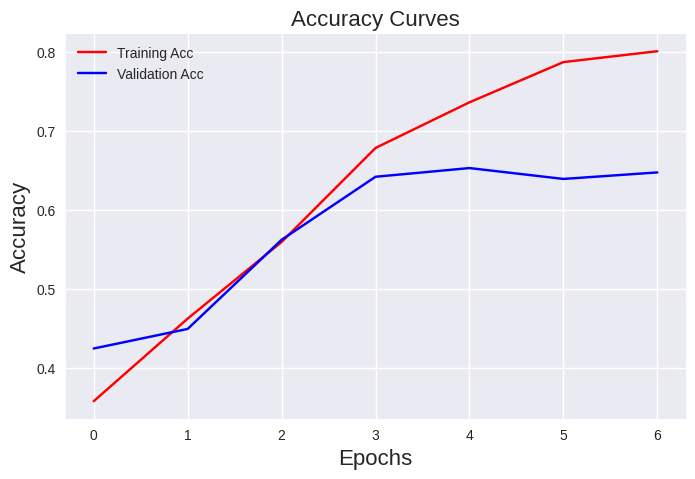

In [413]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

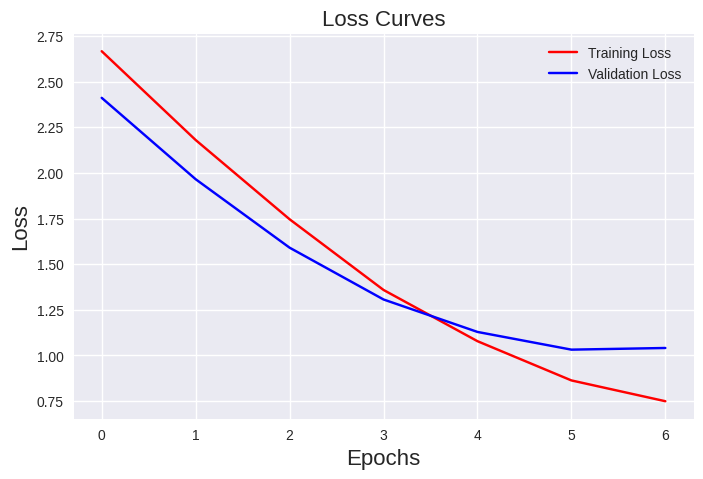

In [414]:
plt.figure(figsize=[8,5])
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

In [417]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = model_.predict(X_test_seq)

y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test_le, y_pred))

# y_pred

12/12 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

           0       0.79      0.54      0.64       115
           1       0.71      0.55      0.62       118
           2       0.61      0.65      0.63       130

   micro avg       0.69      0.58      0.63       363
   macro avg       0.70      0.58      0.63       363
weighted avg       0.70      0.58      0.63       363
 samples avg       0.58      0.58      0.58       363



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

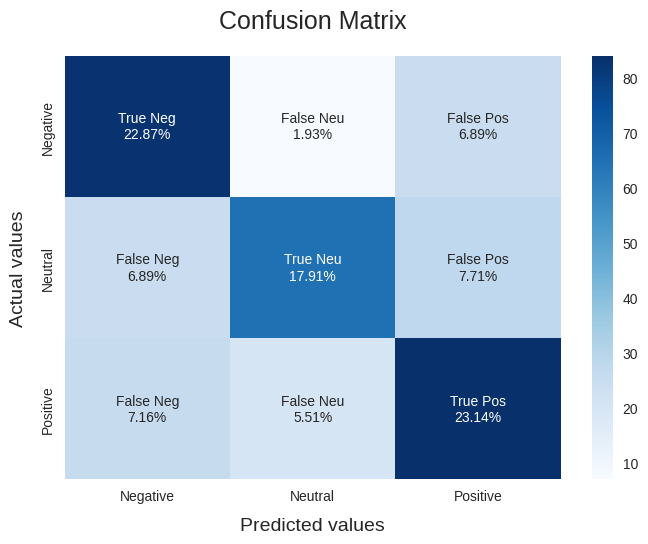

In [418]:
cf_matrix = confusion_matrix(y_test_le.argmax(axis=1), y_pred.argmax(axis=1))

categories  = ['Negative', 'Neutral', 'Positive']
group_names = ['True Neg', 'False Neu', 'False Pos', 'False Neg', 'True Neu', 'False Pos', 'False Neg', 'False Neu', 'True Pos',]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(3,3)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Build the Model Random Forest

In [433]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rf = RandomForestClassifier(n_estimators=500, max_features='sqrt', random_state=42) #acc = 0.16
# rf = RandomForestClassifier(n_estimators=400, random_state=42) #acc = 0.15
# rf = RandomForestClassifier(n_estimators=100, random_state=42) #acc = 0.1542
# rf = RandomForestClassifier(n_estimators=200, random_state=42) #acc = 0.157
# rf = RandomForestClassifier(n_estimators=800, random_state=42) #acc = 0.1515
# rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42) #acc = 0.15
# rf = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=42) #acc = 0.09
rf.fit(X_train_seq, y_train_le)

RandomForestClassifier(n_estimators=500, random_state=42)

In [434]:
# Memprediksi data uji
y_pred = rf.predict(X_test_seq)

accuracy = accuracy_score(y_test_le, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.25895316804407714


Text(0.5, 1.0, 'Confusion Matrix')

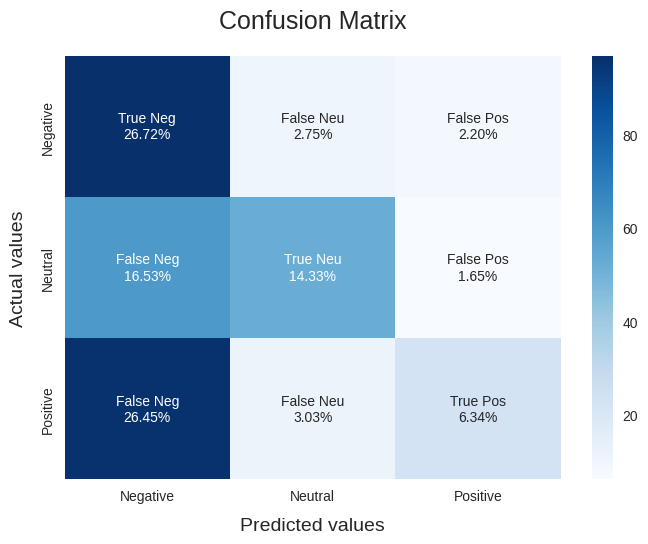

In [435]:
cf_matrix = confusion_matrix(y_test_le.argmax(axis=1), y_pred.argmax(axis=1))

categories  = ['Negative', 'Neutral', 'Positive']
group_names = ['True Neg', 'False Neu', 'False Pos', 'False Neg', 'True Neu', 'False Pos', 'False Neg', 'False Neu', 'True Pos',]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(3,3)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [425]:

param_grid = {
    'n_estimators': [25, 50, 100, 150, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [429]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(X_train_seq, y_train_le)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


In [431]:
rf = RandomForestClassifier(n_estimators=25, max_features=None, max_depth=6,max_leaf_nodes=9, random_state=42) #acc = 0.16

rf.fit(X_train_seq, y_train_le)

# Memprediksi data uji
y_pred = rf.predict(X_test_seq)

accuracy = accuracy_score(y_test_le, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.1763085399449036


Text(0.5, 1.0, 'Confusion Matrix')

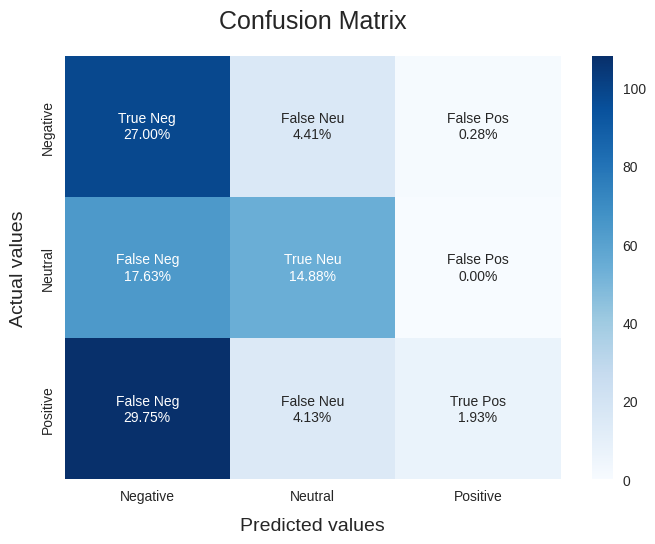

In [432]:
cf_matrix = confusion_matrix(y_test_le.argmax(axis=1), y_pred.argmax(axis=1))

categories  = ['Negative', 'Neutral', 'Positive']
group_names = ['True Neg', 'False Neu', 'False Pos', 'False Neg', 'True Neu', 'False Pos', 'False Neg', 'False Neu', 'True Pos',]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(3,3)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)